### Problem 1:
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import numpy as np   
import pandas as pd
import os
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import math
from sklearn.metrics import roc_auc_score,plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_election=pd.read_excel("D:/GREAT LEARNING/MOD 6 MACHINE LEARNING/Project/Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

### Q 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [3]:
df_election.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [4]:
df_election.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df_election.tail()

vote  age  economic.cond.national  economic.cond.household  \
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female

In [6]:
print("Number of rows: ",df_election.shape[0], "\n""Number. of columns: ",df_election.shape[1])

Number of rows:  1525 
Number. of columns:  9


In [7]:
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df_election.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [9]:
cat_col=['vote','gender']
eco_condition=['economic.cond.national','economic.cond.household']
assessment=['Blair','Hague']
age_sentiments_knowledge=['age','Europe','political.knowledge']

In [10]:
df_election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
df_election.describe()

age  economic.cond.national  economic.cond.household  \
count  1525.000000             1525.000000              1525.000000   
mean     54.182295                3.245902                 3.140328   
std      15.711209                0.880969                 0.929951   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague       Europe  political.knowledge  
count  1525.000000  1525.000000  1525.000000          1525.000000  
mean      3.334426     2.746885     6.728525             1.542295  
std       1.174824     1.230703     3.297538             1.083315  
min       1.000000     1.000000     1.000000             0.000000  
25%       2.000000     2.000000     4.000000             0.000000  
50%       4.000000     2.000000     6.000000             2.000000  
75%       4.000000     4.000000    10.000000             2.000000  
max       5.000000     5.000000    11.000000             3.000000

In [12]:
df_election.describe(include='object')

vote  gender
count     1525    1525
unique       2       2
top     Labour  female
freq      1063     812

In [13]:
#show the information about dataset
df_dtype=df_election.dtypes
df_missing=df_election.isna().mean().round(4)*100
df_desc = df_election.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

missing   dtype   count unique     top  freq  \
vote                         0.0  object    1525      2  Labour  1063   
age                          0.0   int64  1525.0    NaN     NaN   NaN   
economic.cond.national       0.0   int64  1525.0    NaN     NaN   NaN   
economic.cond.household      0.0   int64  1525.0    NaN     NaN   NaN   
Blair                        0.0   int64  1525.0    NaN     NaN   NaN   
Hague                        0.0   int64  1525.0    NaN     NaN   NaN   
Europe                       0.0   int64  1525.0    NaN     NaN   NaN   
political.knowledge          0.0   int64  1525.0    NaN     NaN   NaN   
gender                       0.0  object    1525      2  female   812   

                              mean        std   min   25%   50%   75%   max  
vote                           NaN        NaN   NaN   NaN   NaN   NaN   NaN  
age                      54.182295  15.711209  24.0  41.0  53.0  67.0  93.0  
economic.cond.national    3.245902   0.880969   1.0   3.0   3.0   4.0   5.0  
economic.cond.household   3.140328   0.929951   1.0   3.0   3.0   4.0   5.0  
Blair                     3.334426   1.174824   1.0   2.0   4.0   4.0   5.0  
Hague                     2.746885   1.230703   1.0   2.0   2.0   4.0   5.0  
Europe                    6.728525   3.297538   1.0   4.0   6.0  10.0  11.0  
political.knowledge       1.542295   1.083315   0.0   0.0   2.0   2.0   3.0  
gender                         NaN        NaN   NaN   NaN   NaN   NaN   NaN

In [14]:
for column in df_election.columns:
    if df_election[column].dtype == 'object':
        print(column.upper(),': ',df_election[column].nunique())
        print(df_election[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [15]:
dups = df_election.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_election[dups]

Number of duplicate rows = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [16]:
(8/1525)

0.005245901639344262

In [17]:
df_election.drop_duplicates(inplace=True)

In [18]:
df_election.shape

(1517, 9)

In [19]:
print("Skewness values"'\n',df_election.skew())

Skewness values
 age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [20]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

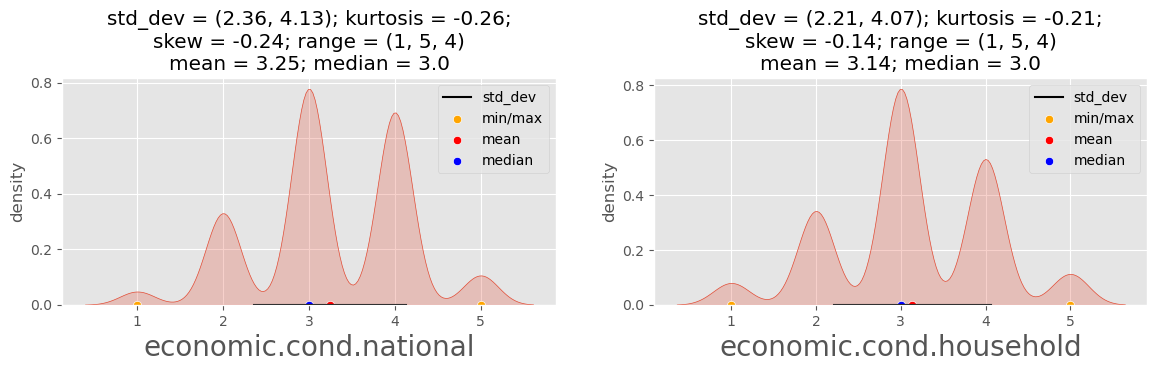

In [21]:
UVA_numeric(df_election,eco_condition)

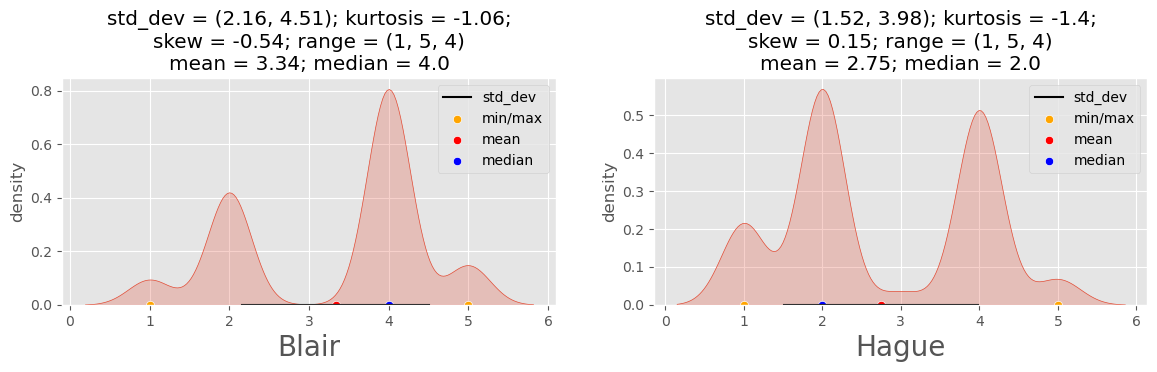

In [22]:
UVA_numeric(df_election,assessment)

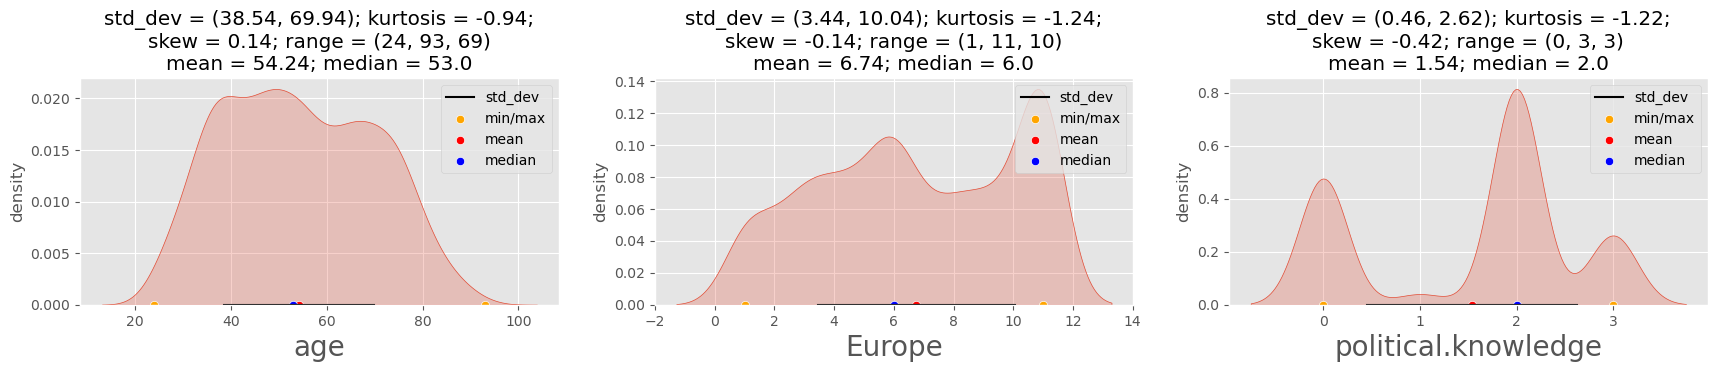

In [23]:
UVA_numeric(df_election,age_sentiments_knowledge)

In [24]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

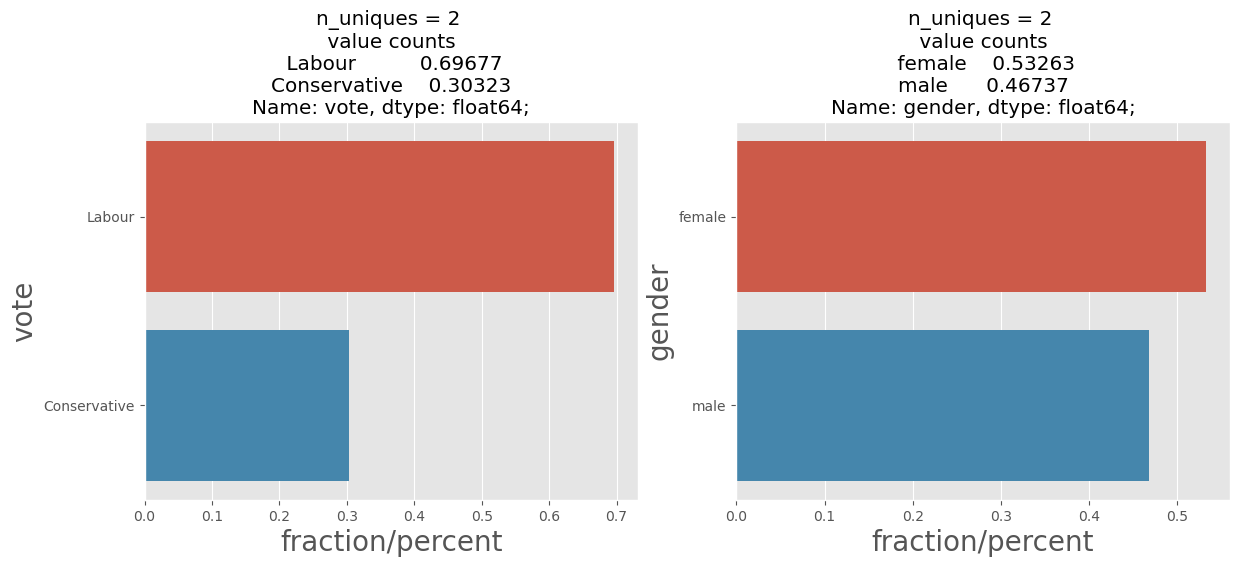

In [25]:
UVA_category(df_election,cat_col)

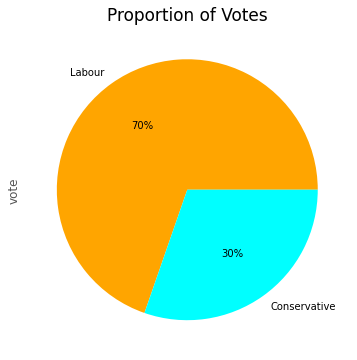

In [26]:
plt.figure(figsize=(6,6))
colors = ['orange','cyan']
df_election.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes',fontsize=17);

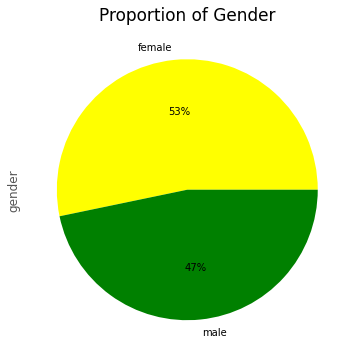

In [27]:
plt.figure(figsize=(6,6))
colors = ['yellow','green']
df_election.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender',fontsize=17);

<Figure size 864x576 with 0 Axes>

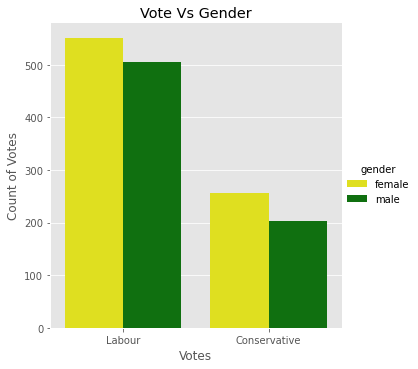

In [28]:
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df_election, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes');

In [29]:
df_election[df_election.vote == "Labour"].age.mean()

53.10974456007568

In [30]:
df_election[df_election.vote == "Conservative"].age.mean()

56.84130434782609

In [31]:
df_election['economic.cond.national'].value_counts(normalize=True)

3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic.cond.national, dtype: float64

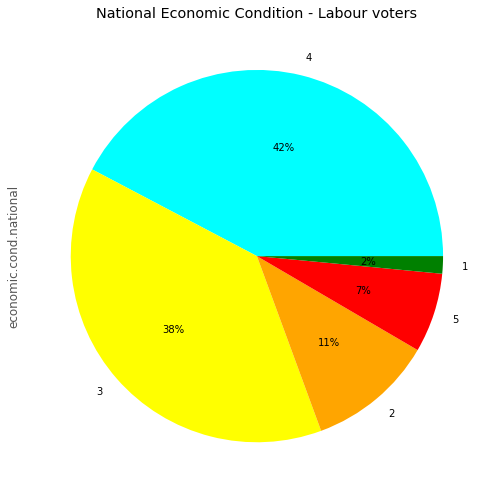

In [32]:
plt.figure(figsize=(9,7))
colors = ['cyan','yellow','orange','red','green']
df_election[df_election.vote == "Labour"]['economic.cond.national'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Labour voters')
plt.tight_layout()

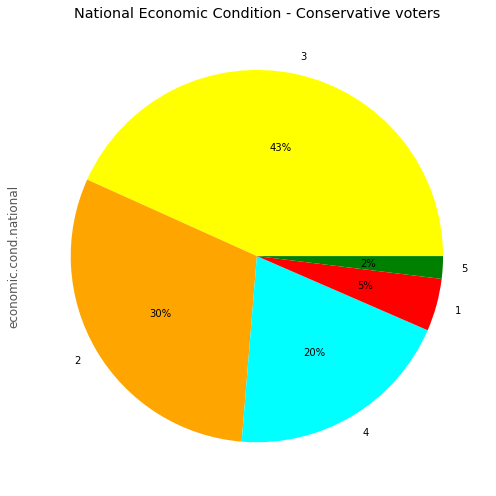

In [33]:
plt.figure(figsize=(8,7))
colors = ['yellow','orange','cyan','red','green']
df_election[df_election.vote == "Conservative"]['economic.cond.national'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Conservative voters')
plt.tight_layout();

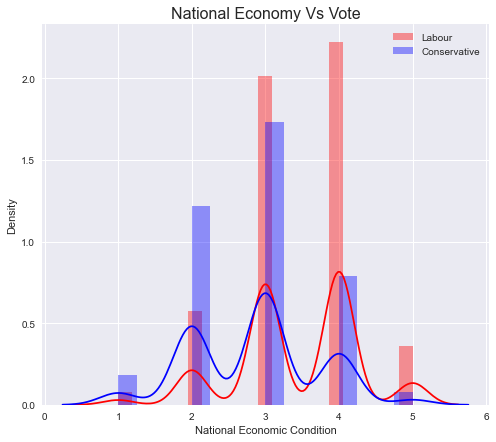

In [34]:
import matplotlib.style
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df_election[df_election.vote=='Labour']['economic.cond.national'], label = 'Labour', color = 'red')
sns.distplot(df_election[df_election.vote=='Conservative']['economic.cond.national'], label = 'Conservative', color = 'blue')
ax.set_title("National Economy Vs Vote",fontsize=16)
ax.set_xlabel('National Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

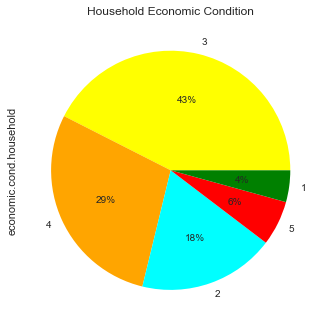

In [35]:
df_election['economic.cond.household'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition')
plt.show()

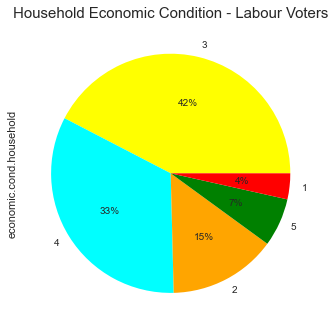

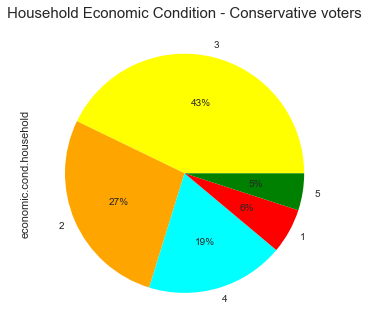

In [36]:
colors = ['yellow','cyan','orange','green', 'red']
plt.figure(0)
df_election[df_election.vote == "Labour"]['economic.cond.household'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Labour Voters',fontsize=15)
plt.figure(1)
colors = ['yellow','orange','cyan','red','green']
df_election[df_election.vote == "Conservative"]['economic.cond.household'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Conservative voters',fontsize=15)
plt.show()

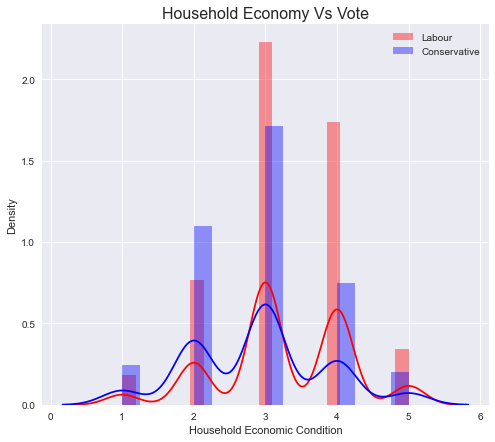

In [37]:
import matplotlib.style
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df_election[df_election.vote=='Labour']['economic.cond.household'], label = 'Labour', color = 'red')
sns.distplot(df_election[df_election.vote=='Conservative']['economic.cond.household'], label = 'Conservative', color = 'blue')
ax.set_title("Household Economy Vs Vote",fontsize=16)
ax.set_xlabel('Household Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

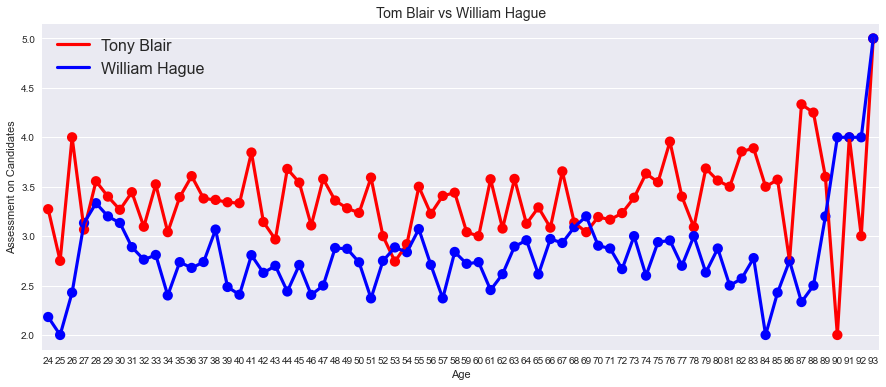

In [38]:
f, ax = plt.subplots(figsize = (15,6))
ax = sns.pointplot(x='age', y="Blair", data=df_election, ci = None, color = 'red', label = 'Blair')
ax=sns.pointplot(x="age", y="Hague", data=df_election, ci = None, color = 'blue', label = 'Hague')
ax.set_xlabel('Age')
ax.set_ylabel('Assessment on Candidates')
plt.title("Tom Blair vs William Hague",fontsize=(14))
label=('Tony Blair','William Hague')
ax.legend(label,fontsize=16)
plt.show()

<Figure size 576x396 with 0 Axes>

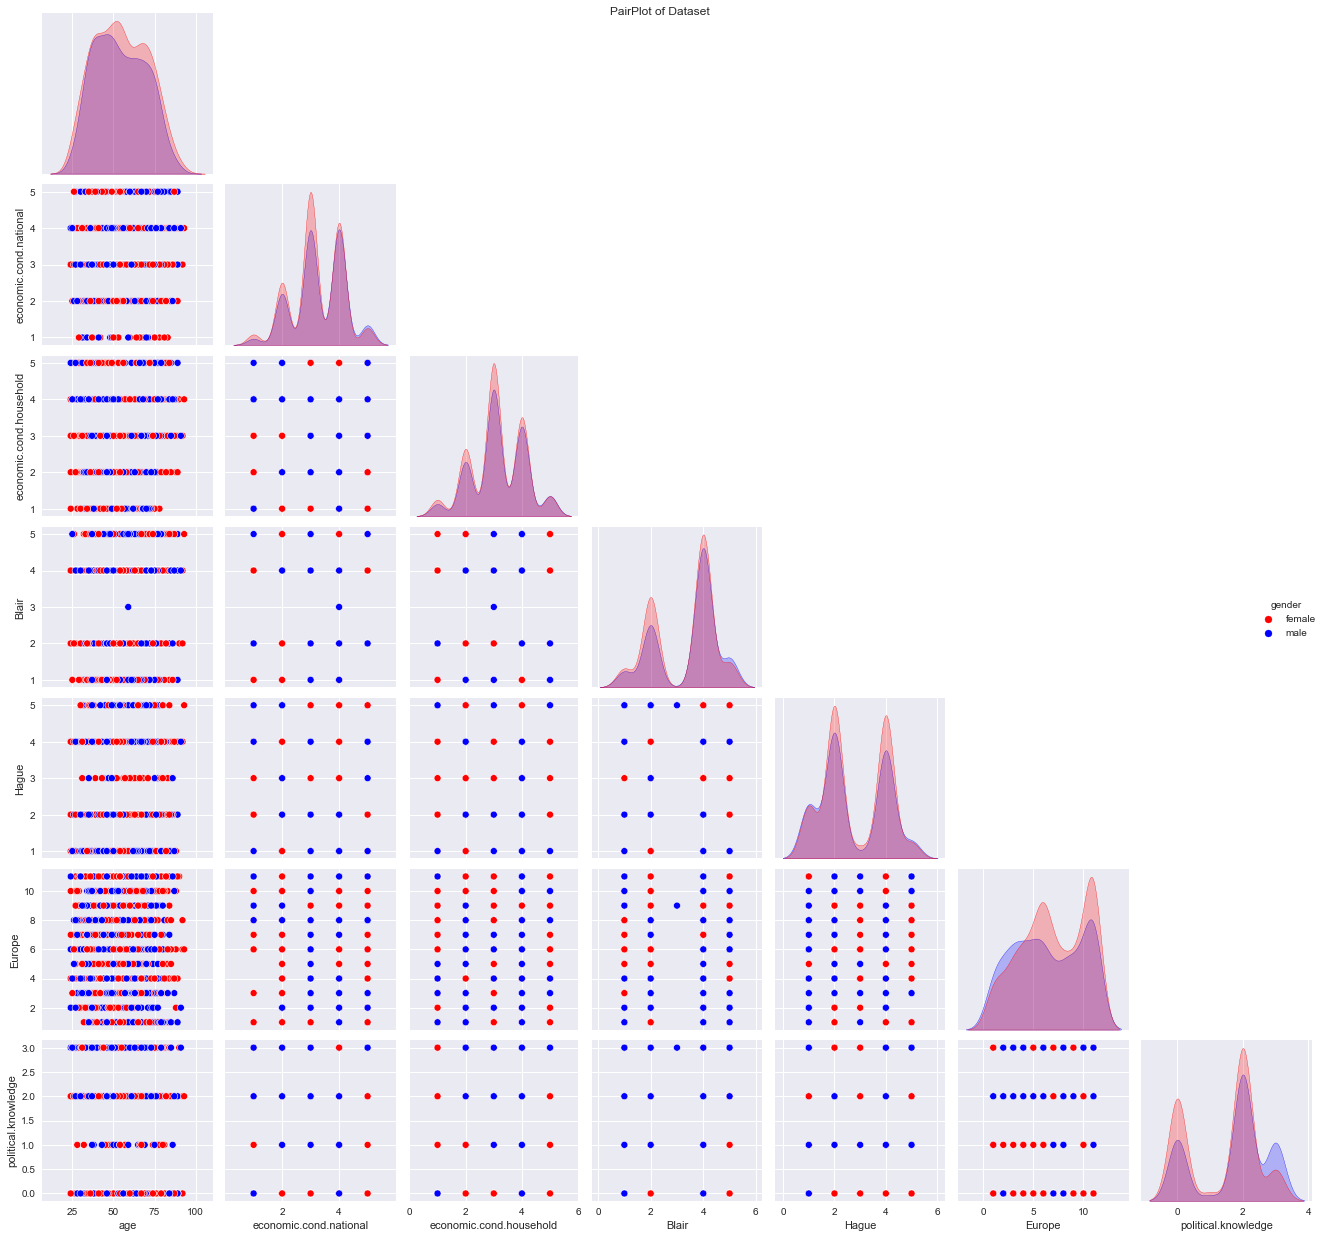

In [39]:
plt.tight_layout()
pairplot = sns.pairplot(df_election,diag_kind='kde',hue='gender',palette=['red','blue'],corner=True)
pairplot.fig.suptitle("PairPlot of Dataset")
plt.tight_layout();

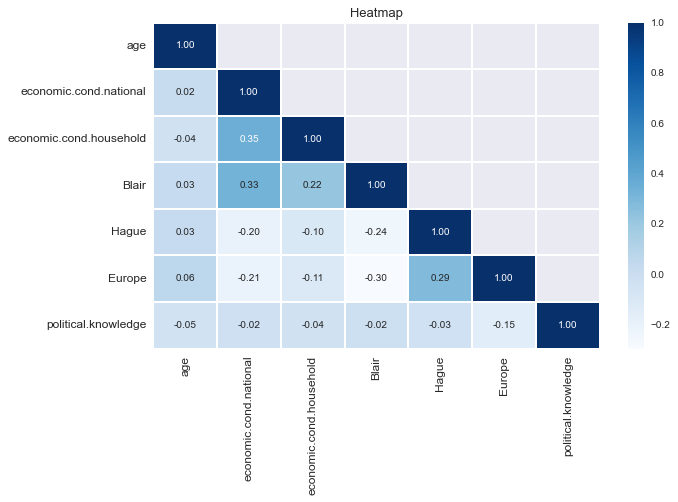

In [40]:
#We can perfom correlation between variables by using heat map
plt.figure(figsize=(10,6))
res=sns.heatmap(df_election.corr(),annot=True,fmt=".2f",cmap="Blues",linewidths=1.5,mask=np.triu(df_election.corr(),+1));
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
plt.title("Heatmap",fontsize=13)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12);

In [41]:
cat=[]
num=[]
for i in df_election.columns:
    if df_election[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


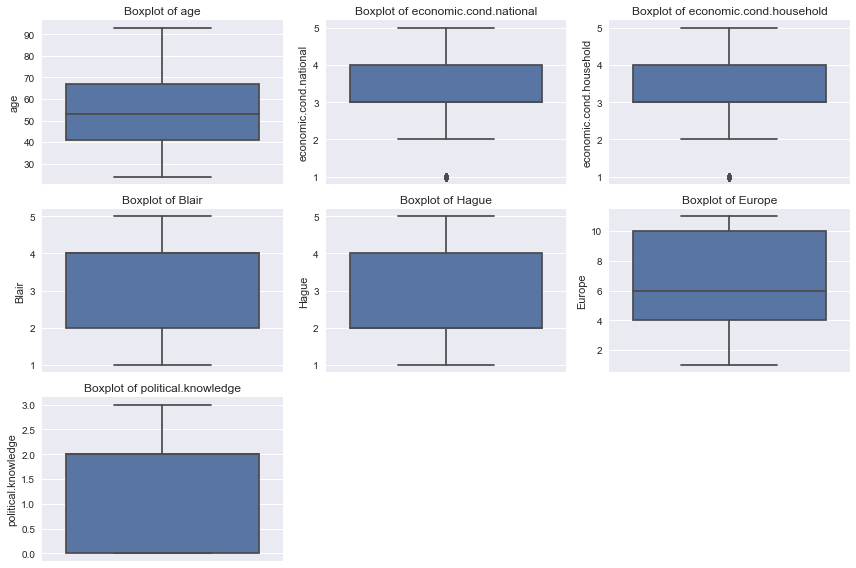

In [42]:
df1=df_election[num]
plt.figure(figsize = (12,8))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [43]:
print(pd.Categorical(df_election['gender'].unique()))
print(pd.Categorical(df_election['gender'].unique()).codes)
df_election['gender']=pd.Categorical(df_election['gender']).codes

['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [44]:
print(pd.Categorical(df_election['vote'].unique()))
print(pd.Categorical(df_election['vote'].unique()).codes)
df_election['vote']=pd.Categorical(df_election['vote']).codes

['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


In [45]:
df_election.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [46]:
df_election.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [47]:
# Copy all the predictor variables into X dataframe
X = df_election.drop('vote', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df_election[['vote']]
X.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  gender  
0                    2       0  
1                    2       1  
2                    2       1  
3                    0       0  
4                    2       1

In [48]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1234)

In [49]:
#Checking the dimensions of the training and test data
print("Dimensions of the training and test data")
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Observations are',1517)

Dimensions of the training and test data
X_train (1061, 8)
X_test (456, 8)
y_train (1061, 1)
y_test (456, 1)
Total Observations are 1517


In [50]:
print("Dimensions of the training and test data")
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)
print("Total number of Observations are",1517)

Dimensions of the training and test data
Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)
Total number of Observations are 1517


### Q1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis

### Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=1)
logit_model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=1, penalty='none', solver='newton-cg',
                   verbose=True)

In [52]:
logit_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': 1,
 'penalty': 'none',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': True,
 'warm_start': False}

In [53]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [54]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).round(2).sample(5)

0     1
362  0.08  0.92
22   0.41  0.59
106  0.13  0.87
223  0.12  0.88
104  0.07  0.93

In [55]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False).reset_index(drop=True)
feature_rank.round(2)

Feature  Importance
0                    Blair        0.72
1   economic.cond.national        0.41
2  economic.cond.household        0.30
3                   gender        0.13
4                      age       -0.02
5                   Europe       -0.21
6      political.knowledge       -0.41
7                    Hague       -0.87

### Confusion Matrix for the training data

In [56]:
confusion_matrix(y_train, ytrain_predict)

array([[223, 108],
       [ 69, 661]], dtype=int64)

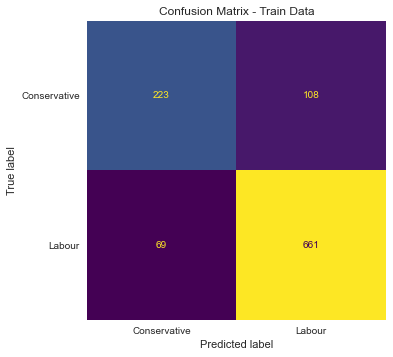

In [57]:
plot_confusion_matrix(logit_model,X_train,y_train,colorbar=False)
plt.grid(False)
plt.title('Confusion Matrix - Train Data')
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.show();

In [58]:
#Train Data Accuracy
logit_train_acc=logit_model.score(X_train,y_train) 
logit_train_acc.round(2)

0.83

In [59]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.67      0.72       331
           1       0.86      0.91      0.88       730

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [60]:
logit_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose().round(2)


In [61]:
df

precision  recall  f1-score  support
0                  0.76    0.67      0.72   331.00
1                  0.86    0.91      0.88   730.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.81    0.79      0.80  1061.00
weighted avg       0.83    0.83      0.83  1061.00

In [62]:
logit_train_precision_conservative=df.loc["0"][0]
logit_train_recall_conservative=df.loc["0"][1]
logit_train_f1_conservative=df.loc["0"][2]
print ('logit_train_precision_conservative ',logit_train_precision_conservative)
print ('logit_train_recall_conservative ',logit_train_recall_conservative)
print ('logit_train_f1_conservative ',logit_train_f1_conservative)
logit_train_precision_labour=df.loc["1"][0]
logit_train_recall_labour=df.loc["1"][1]
logit_train_f1_labour=df.loc["1"][2]
print ('logit_train_precision_labour ',logit_train_precision_labour)
print ('logit_train_recall_labour ',logit_train_recall_labour)
print ('logit_train_f1_labour ',logit_train_f1_labour)

logit_train_precision_conservative  0.76
logit_train_recall_conservative  0.67
logit_train_f1_conservative  0.72
logit_train_precision_labour  0.86
logit_train_recall_labour  0.91
logit_train_f1_labour  0.88


### AUC and ROC for the training data

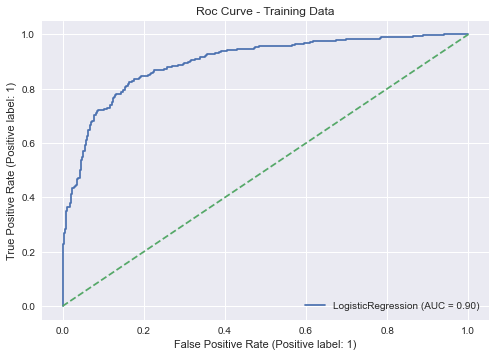

In [63]:
plot_roc_curve(estimator=logit_model,
               X=X_train, 
               y=y_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Roc Curve - Training Data');

### Confusion Matrix for test data

In [64]:
confusion_matrix(y_test,ytest_predict)

array([[ 79,  50],
       [ 35, 292]], dtype=int64)

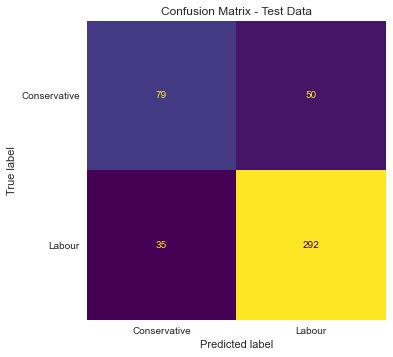

In [65]:
plot_confusion_matrix(logit_model,X_test,y_test,colorbar=False)
plt.grid(False)
plt.title('Confusion Matrix - Test Data')
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.show();

In [66]:
#Test Data Accuracy
logit_test_acc=logit_model.score(X_test,y_test)
logit_test_acc.round(2)

0.81

In [67]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       129
           1       0.85      0.89      0.87       327

    accuracy                           0.81       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.81      0.81      0.81       456



In [68]:
logit_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose().round(2)

In [69]:
df

precision  recall  f1-score  support
0                  0.69    0.61      0.65   129.00
1                  0.85    0.89      0.87   327.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.77    0.75      0.76   456.00
weighted avg       0.81    0.81      0.81   456.00

In [70]:
logit_test_precision_conservative=df.loc["0"][0]
logit_test_recall_conservative=df.loc["0"][1]
logit_test_f1_conservative=df.loc["0"][2]
print ('logit_test_precision_conservative ',logit_test_precision_conservative)
print ('logit_test_recall_conservative ',logit_test_recall_conservative)
print ('logit_test_f1_conservative',logit_test_f1_conservative)
logit_test_precision_labour=df.loc["1"][0]
logit_test_recall_labour=df.loc["1"][1]
logit_test_f1_labour=df.loc["1"][2]
print ('logit_test_precision_labour ',logit_test_precision_labour)
print ('logit_test_recall ',logit_test_recall_labour)
print ('logit_test_f1_labour ',logit_test_f1_labour)

logit_test_precision_conservative  0.69
logit_test_recall_conservative  0.61
logit_test_f1_conservative 0.65
logit_test_precision_labour  0.85
logit_test_recall  0.89
logit_test_f1_labour  0.87


### AUC and ROC for the test data

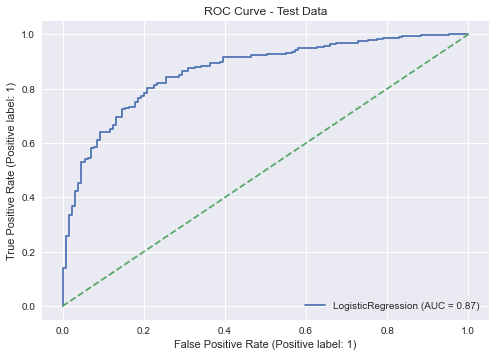

In [71]:
plot_roc_curve(estimator=logit_model,X=X_test,y=y_test)
plt.title('ROC Curve - Test Data')
plt.plot([0,1],[0,1],linestyle='--')
plt.show();

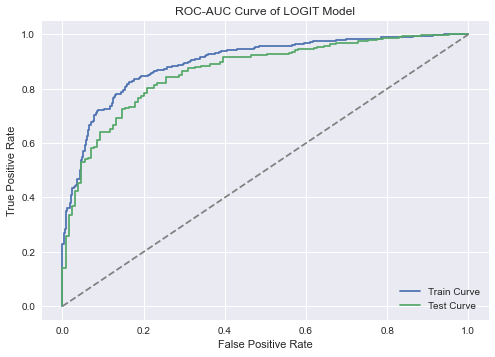

In [72]:
fig,ax = plt.subplots()
plot_roc_curve(logit_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(logit_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of LOGIT Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### LDA Model

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [74]:
LDA_model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [75]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [76]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).round(2).head(10)

0     1
0  0.52  0.48
1  0.11  0.89
2  0.26  0.74
3  0.05  0.95
4  0.38  0.62
5  0.02  0.98
6  0.49  0.51
7  0.02  0.98
8  0.01  0.99
9  0.07  0.93

# Model Evaluation

### Confusion Matrix for the training data

In [77]:
confusion_matrix(y_train, ytrain_predict)

array([[227, 104],
       [ 72, 658]], dtype=int64)

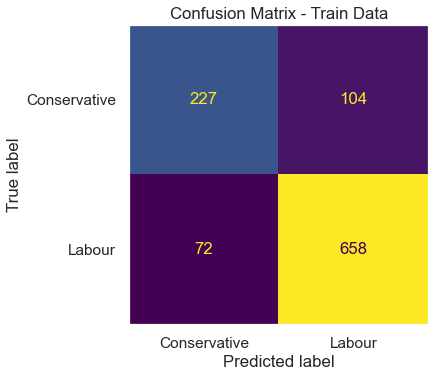

In [78]:
plot_confusion_matrix(LDA_model,X_train,y_train,colorbar=False);
plt.grid(False)
plt.title('Confusion Matrix - Train Data')
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames);

In [79]:
#Train Data Accuracy
lda_train_acc=LDA_model.score(X_train,y_train) 
lda_train_acc.round(2)

0.83

In [80]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       331
           1       0.86      0.90      0.88       730

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [81]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose().round(2)

In [82]:
df

precision  recall  f1-score  support
0                  0.76    0.69      0.72   331.00
1                  0.86    0.90      0.88   730.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.81    0.79      0.80  1061.00
weighted avg       0.83    0.83      0.83  1061.00

In [83]:
lda_train_precision_conservative=df.loc["0"][0]
lda_train_recall_conservative=df.loc["0"][1]
lda_train_f1_conservative=df.loc["0"][2]
print ('lda_train_precision_conservative ',lda_train_precision_conservative)
print ('lda_train_recall_conservative ',lda_train_recall_conservative)
print ('lda_train_f1_conservative ',lda_train_f1_conservative)
lda_train_precision_labour=df.loc["1"][0]
lda_train_recall_labour=df.loc["1"][1]
lda_train_f1_labour=df.loc["1"][2]
print ('lda_train_precision_labor',lda_train_precision_labour)
print ('lda_train_recall_labour ',lda_train_recall_labour)
print ('lda_train_f1_labour ',lda_train_f1_labour)

lda_train_precision_conservative  0.76
lda_train_recall_conservative  0.69
lda_train_f1_conservative  0.72
lda_train_precision_labor 0.86
lda_train_recall_labour  0.9
lda_train_f1_labour  0.88


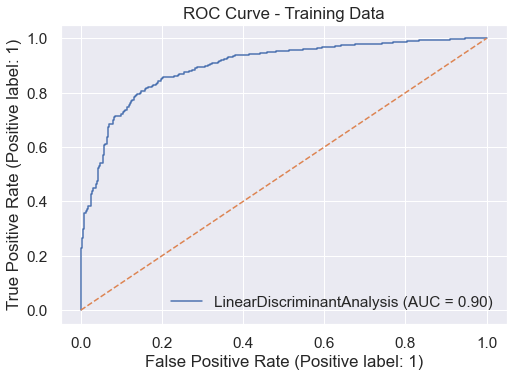

In [84]:
plot_roc_curve(estimator=LDA_model,X=X_train,y=y_train);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC Curve - Training Data');

### Confusion Matrix For Test Data

In [85]:
confusion_matrix(y_test,ytest_predict)

array([[ 83,  46],
       [ 36, 291]], dtype=int64)

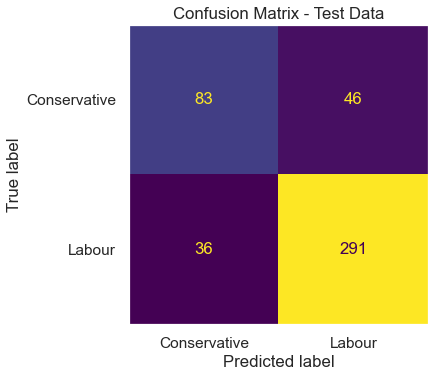

In [86]:
plot_confusion_matrix(LDA_model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [87]:
# Test Data Accuracy
lda_test_acc=LDA_model.score(X_test,y_test)
lda_test_acc.round(2)

0.82

In [88]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       129
           1       0.86      0.89      0.88       327

    accuracy                           0.82       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.82      0.82      0.82       456



In [89]:
lda_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).T.round(2)


In [90]:
df

precision  recall  f1-score  support
0                  0.70    0.64      0.67   129.00
1                  0.86    0.89      0.88   327.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.78    0.77      0.77   456.00
weighted avg       0.82    0.82      0.82   456.00

In [91]:
lda_test_precision_conservative=df.loc["0"][0]
lda_test_recall_conservative=df.loc["0"][1]
lda_test_f1_conservative=df.loc["0"][2]
print ('lda_test_precision_conservative ',lda_test_precision_conservative)
print ('lda_test_recall_conservative ',lda_test_recall_conservative)
print ('lda_test_f1_conservative ',lda_test_f1_conservative)
lda_test_precision_labour=df.loc["1"][0]
lda_test_recall_labour=df.loc["1"][1]
lda_test_f1_labour=df.loc["1"][2]
print ('lda_test_precision_labor',lda_test_precision_labour)
print ('lda_test_recall_labour ',lda_test_recall_labour)
print ('lda_test_f1_labour ',lda_test_f1_labour)

lda_test_precision_conservative  0.7
lda_test_recall_conservative  0.64
lda_test_f1_conservative  0.67
lda_test_precision_labor 0.86
lda_test_recall_labour  0.89
lda_test_f1_labour  0.88


### AUC and ROC curve for Test Data

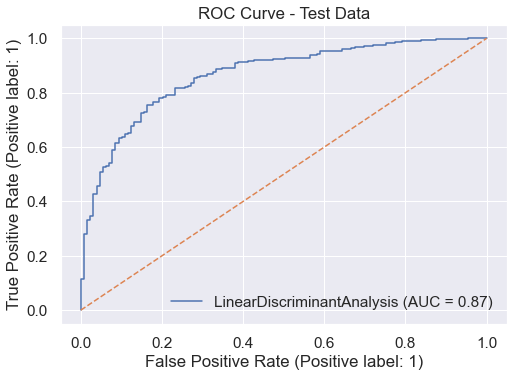

In [92]:
plot_roc_curve(estimator=LDA_model,X=X_test,y=y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve - Test Data');

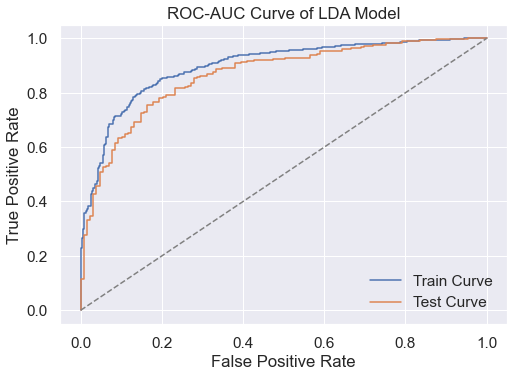

In [93]:
fig,ax = plt.subplots()
plot_roc_curve(LDA_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(LDA_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of LDA Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model.

### KNN Model

In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [95]:
X_train_scaled.mean(axis=0)

array([-2.00907465e-16,  1.01290847e-16, -1.03802190e-16, -3.85072642e-17,
       -8.37114439e-17, -9.37568172e-17, -3.34845776e-17,  0.00000000e+00])

In [96]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [98]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [99]:
ytrain_predict=knn_model.predict(X_train_scaled)
ytest_predict=knn_model.predict(X_test_scaled)

In [100]:
ytest_predict
ytest_predict_prob=knn_model.predict_proba(X_test_scaled)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

0    1
0  0.6  0.4
1  0.0  1.0
2  0.2  0.8
3  0.0  1.0
4  0.8  0.2

### Model Evaluation

### Confusion Matrix For Training Data

In [101]:
confusion_matrix(y_train,ytrain_predict)

array([[251,  80],
       [ 72, 658]], dtype=int64)

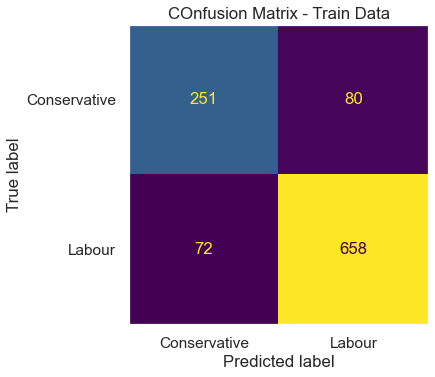

In [102]:
plot_confusion_matrix(knn_model,X_train_scaled,y_train,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('COnfusion Matrix - Train Data');

In [103]:
# train Data accuracy
knn_train_acc=knn_model.score(X_train_scaled,y_train)
knn_train_acc.round(2)

0.86

In [104]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       331
           1       0.89      0.90      0.90       730

    accuracy                           0.86      1061
   macro avg       0.83      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [105]:
knn_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).T.round(2)
df

precision  recall  f1-score  support
0                  0.78    0.76      0.77   331.00
1                  0.89    0.90      0.90   730.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.83    0.83      0.83  1061.00
weighted avg       0.86    0.86      0.86  1061.00

In [106]:
knn_train_precision_conservative=df.loc['0'][0]
knn_train_recall_conservative=df.loc['0'][1]
knn_train_f1_conservative=df.loc['0'][2]
print('knn_train_precision_Conservative',knn_train_precision_conservative)
print('knn_train_recall_Conservative',knn_train_recall_conservative)
print('knn_train_f1_Conservative',knn_train_f1_conservative)
knn_train_precision_labour=df.loc['1'][0]
knn_train_recall_labour=df.loc['1'][1]
knn_train_f1_labour=df.loc['1'][2]
print('knn_train_precision_Labour',knn_train_precision_labour)
print('knn_train_recall_Labour',knn_train_recall_labour)
print('knn_train_f1_Labour',knn_train_f1_labour)

knn_train_precision_Conservative 0.78
knn_train_recall_Conservative 0.76
knn_train_f1_Conservative 0.77
knn_train_precision_Labour 0.89
knn_train_recall_Labour 0.9
knn_train_f1_Labour 0.9


### AUC and ROC for Train Data

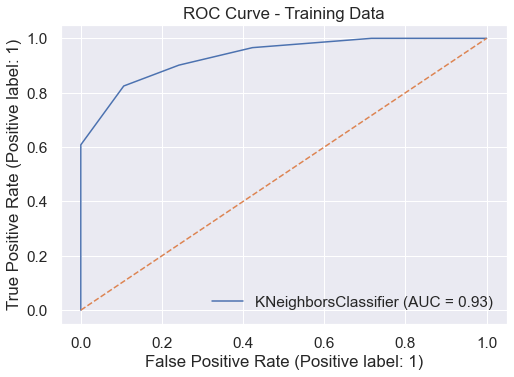

In [107]:
plot_roc_curve(estimator=knn_model,X=X_train_scaled,y=y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve - Training Data');

### Confusion Matrix for Test Data

In [108]:
confusion_matrix(y_test,ytest_predict)

array([[ 87,  42],
       [ 37, 290]], dtype=int64)

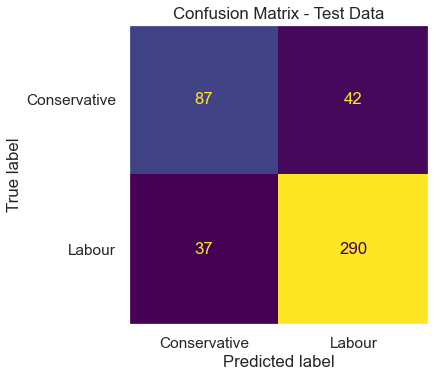

In [109]:
plot_confusion_matrix(knn_model,X_test_scaled,y_test,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [110]:
# test data accuracy
knn_test_acc=knn_model.score(X_test_scaled,y_test)
knn_test_acc.round(2)

0.83

In [111]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       129
           1       0.87      0.89      0.88       327

    accuracy                           0.83       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.83      0.83       456



In [112]:
knn_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).T.round(2)
df

precision  recall  f1-score  support
0                  0.70    0.67      0.69   129.00
1                  0.87    0.89      0.88   327.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.79    0.78      0.78   456.00
weighted avg       0.82    0.83      0.83   456.00

In [113]:
knn_test_precision_conservative=df.loc['0'][0]
knn_test_recall_conservative=df.loc['0'][1]
knn_test_f1_conservative=df.loc['0'][2]
knn_test_precision_labour=df.loc['1'][0]
knn_test_recall_labour=df.loc['1'][1]
knn_test_f1_labour=df.loc['1'][2]
print('knn_test_precision_conservative',knn_test_precision_conservative)
print('knn_test_recall_conservative',knn_test_recall_conservative)
print('knn_test_f1_conservative',knn_test_f1_conservative)
print('knn_test_precision_labour',knn_test_precision_labour)
print('knn_test_recall_labour',knn_test_recall_labour)
print('knn_test_f1_labour',knn_test_f1_labour)

knn_test_precision_conservative 0.7
knn_test_recall_conservative 0.67
knn_test_f1_conservative 0.69
knn_test_precision_labour 0.87
knn_test_recall_labour 0.89
knn_test_f1_labour 0.88


### ROC and AUC for Test Data

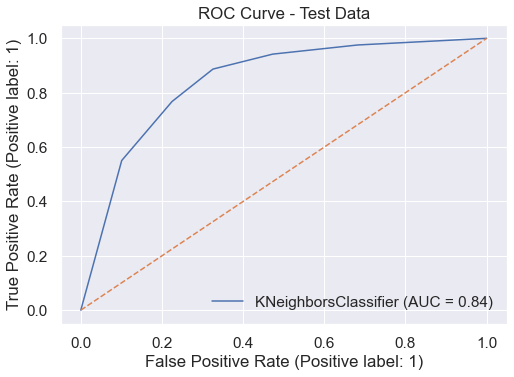

In [114]:
plot_roc_curve(estimator=knn_model,X=X_test_scaled,y=y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve - Test Data');

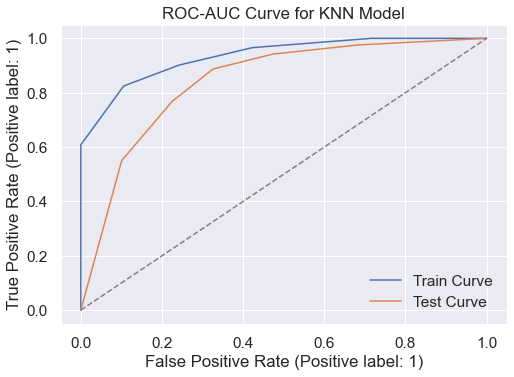

In [115]:
fig,ax=plt.subplots()
plot_roc_curve(knn_model,X_train_scaled,y_train,ax=ax,label='Train Curve');
plot_roc_curve(knn_model,X_test_scaled,y_test,ax=ax,label='Test Curve');
plt.title('ROC-AUC Curve for KNN Model')
plt.plot([0,1],[0,1],linestyle='--',color='grey');

### Naive Bayes Model

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [118]:
nb_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [119]:
ytrain_predict=nb_model.predict(X_train)
ytest_predict=nb_model.predict(X_test)

In [120]:
ytest_predict_prob=nb_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).round(2).head()

0     1
0  0.68  0.32
1  0.09  0.91
2  0.11  0.89
3  0.01  0.99
4  0.67  0.33

### Model Evalution

### Confusion Matrix for training data

In [121]:
confusion_matrix(y_train,ytrain_predict)

array([[242,  89],
       [ 83, 647]], dtype=int64)

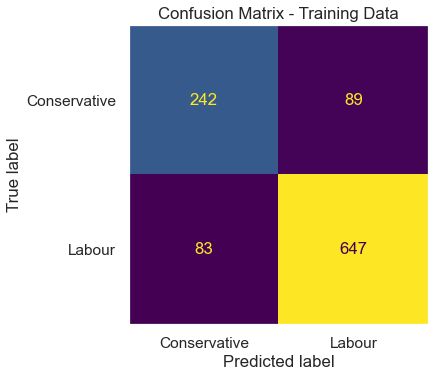

In [122]:
plot_confusion_matrix(nb_model,X_train,y_train,colorbar=False)
plt.title('Confusion Matrix - Training Data')
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.grid(False);

In [123]:
# Train data accuracy
nb_train_acc=nb_model.score(X_train,y_train)
nb_train_acc.round(2)

0.84

In [124]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       331
           1       0.88      0.89      0.88       730

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [125]:
nb_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df_nb_train=pd.DataFrame(nb_metrics).T.round(2)
df_nb_train

precision  recall  f1-score  support
0                  0.74    0.73      0.74   331.00
1                  0.88    0.89      0.88   730.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.81    0.81      0.81  1061.00
weighted avg       0.84    0.84      0.84  1061.00

In [126]:
nb_train_precision_conservative=df_nb_train.loc['0'][0]
nb_train_recall_conservative=df_nb_train.loc['0'][1]
nb_train_f1_conservative=df_nb_train.loc['0'][2]
print('nb_train_precision_conservative',nb_train_precision_conservative)
print('nb_rain_recall_conservative',nb_train_recall_conservative)
print('nb_train_f1_conservative',nb_train_f1_conservative)
nb_train_precision_labour=df_nb_train.loc['1'][0]
nb_train_recall_labour=df_nb_train.loc['1'][1]
nb_train_f1_labour=df_nb_train.loc['1'][2]
print('nb_train_precision_labour',nb_train_precision_labour)
print('nb_train_recall_labour',nb_train_recall_labour)
print('nb_train_f1_labour',nb_train_f1_labour)

nb_train_precision_conservative 0.74
nb_rain_recall_conservative 0.73
nb_train_f1_conservative 0.74
nb_train_precision_labour 0.88
nb_train_recall_labour 0.89
nb_train_f1_labour 0.88


### ROC and AUC for Training Data

AUC:0.89


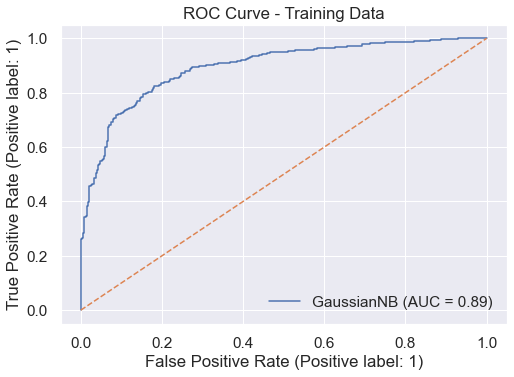

In [127]:
probs=nb_model.predict_proba(X_train)
probs=probs[:,1]
nb_train_auc=roc_auc_score(y_train,probs)
print('AUC:%.2f'% nb_train_auc)

plot_roc_curve(estimator=nb_model,X=X_train,y=y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve - Training Data');

### Confusion Matrix for Test Data

In [128]:
confusion_matrix(y_test,ytest_predict)

array([[ 83,  46],
       [ 43, 284]], dtype=int64)

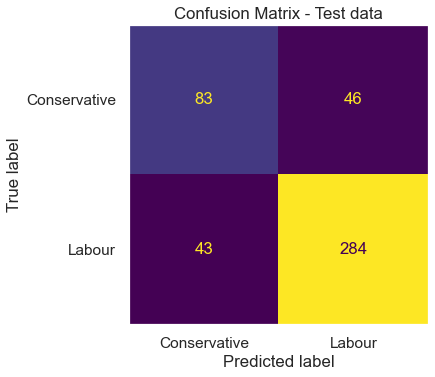

In [129]:
plot_confusion_matrix(nb_model,X_test,y_test,colorbar=False)
plt.title('Confusion Matrix - Test data')
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.grid(False);

In [130]:
# test data accuracy
nb_test_acc=nb_model.score(X_test,y_test)
nb_test_acc.round(2)

0.8

In [131]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       129
           1       0.86      0.87      0.86       327

    accuracy                           0.80       456
   macro avg       0.76      0.76      0.76       456
weighted avg       0.80      0.80      0.80       456



In [132]:
nb_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df_nb_test=pd.DataFrame(nb_metrics).T.round(2)
df_nb_test

precision  recall  f1-score  support
0                  0.66    0.64      0.65    129.0
1                  0.86    0.87      0.86    327.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.76    0.76      0.76    456.0
weighted avg       0.80    0.80      0.80    456.0

In [133]:
nb_test_precision_conservative=df_nb_test.loc['0'][0]
nb_test_recall_conservative=df_nb_test.loc['0'][1]
nb_test_f1_conservative=df.loc['0'][2]
print('nb_test_precision_conservative',nb_test_precision_conservative)
print('nb_test_recall_conservative',nb_test_recall_conservative)
print('nb_test_f1_conservative',nb_test_f1_conservative)
nb_test_precision_labour=df_nb_test.loc['1'][0]
nb_test_recall_labour=df_nb_test.loc['1'][1]
nb_test_f1_labour=df_nb_test.loc['1'][2]
print('nb_test_precision_labour',nb_test_precision_labour)
print('nb_test_recall_labour',nb_test_recall_labour)
print('nb_test_f1_labour',nb_test_f1_labour)

nb_test_precision_conservative 0.66
nb_test_recall_conservative 0.64
nb_test_f1_conservative 0.69
nb_test_precision_labour 0.86
nb_test_recall_labour 0.87
nb_test_f1_labour 0.86


### ROC and AUC for Test Data

AUC:0.86


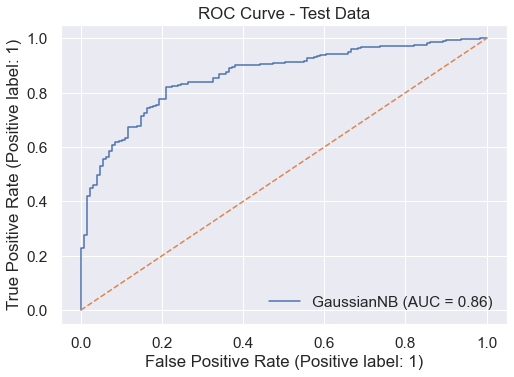

In [134]:
probs=nb_model.predict_proba(X_test)
probs=probs[:,1]
nb_test_auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'% nb_test_auc)
plot_roc_curve(nb_model,X_test,y_test)
plt.title('ROC Curve - Test Data')
plt.plot([0,1],[0,1],linestyle='--');

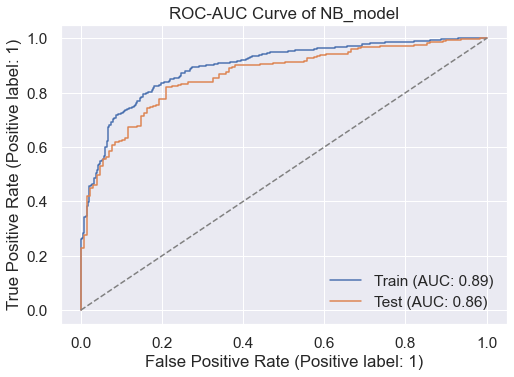

In [135]:
fig,ax=plt.subplots()
plot_roc_curve(nb_model,X_train,y_train,ax=ax,label='Train (AUC: %0.2f)'% nb_train_auc)
plot_roc_curve(nb_model,X_test,y_test,ax=ax,label='Test (AUC: %0.2f)'% nb_test_auc)
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve of NB_model');

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [136]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [137]:
df_election.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

### Model Tunning

In [138]:
sm=SMOTE(random_state=1234)
X_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)

In [139]:
print('Before SMOTE:',X_train.shape)
print('After SMOTE:',X_train_smote.shape)

Before SMOTE: (1061, 8)
After SMOTE: (1460, 8)


### Linear Regression with SMOTE

In [140]:
logit_smote_model=LogisticRegression()
logit_smote_model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [141]:
ytrain_predict=logit_smote_model.predict(X_train_smote)
ytest_predict=logit_smote_model.predict(X_test)

### Confusion Matrix For Training Data

In [142]:
confusion_matrix(y_train_smote,ytrain_predict)

array([[617, 113],
       [123, 607]], dtype=int64)

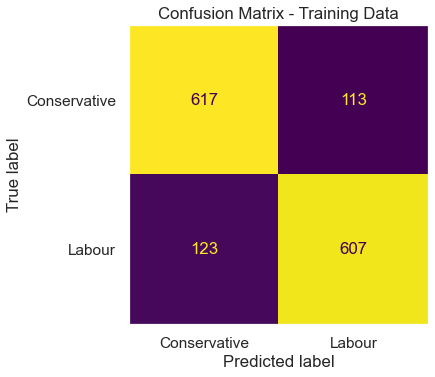

In [143]:
plot_confusion_matrix(logit_smote_model,X_train_smote,y_train_smote,colorbar=False)
plt.title('Confusion Matrix - Training Data')
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames);

In [144]:
# train data Accuracy
logit_sm_train_acc=logit_smote_model.score(X_train_smote,y_train_smote)
logit_sm_train_acc.round(2)

0.84

In [145]:
print(classification_report(y_train_smote,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       730
           1       0.84      0.83      0.84       730

    accuracy                           0.84      1460
   macro avg       0.84      0.84      0.84      1460
weighted avg       0.84      0.84      0.84      1460



In [146]:
logit_metrics=classification_report(y_train_smote,ytrain_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).T.round(2)
df

precision  recall  f1-score  support
0                  0.83    0.85      0.84   730.00
1                  0.84    0.83      0.84   730.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.84    0.84      0.84  1460.00
weighted avg       0.84    0.84      0.84  1460.00

In [147]:
logit_train_precision_conservative=df.loc['0'][0]
print('logit_train_precision_conservative',logit_train_precision_conservative)
logit_train_recall_conservative=df.loc['0'][1]
print('logit_train_recall_conservative',logit_train_recall_conservative)
logit_train_f1_conservative=df.loc['0'][2]
print('logit_train_f1_conservative',logit_train_f1_conservative)
logit_train_precision_labour=df.loc['1'][0]
print('logit_train_precision_labour',logit_train_precision_labour)
logit_train_recall_labour=df.loc['1'][1]
print('logit_train_recall_labour',logit_train_recall_labour)
logit_train_f1_labour=df.loc['1'][2]
print('logit_train_f1_labour',logit_train_f1_labour)

logit_train_precision_conservative 0.83
logit_train_recall_conservative 0.85
logit_train_f1_conservative 0.84
logit_train_precision_labour 0.84
logit_train_recall_labour 0.83
logit_train_f1_labour 0.84


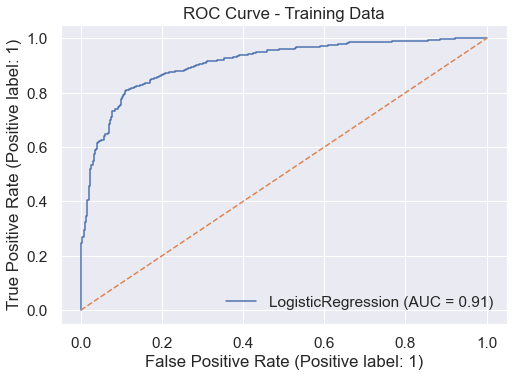

In [148]:
plot_roc_curve(logit_smote_model,X_train_smote,y_train_smote)
plt.title('ROC Curve - Training Data')
plt.plot([0,1],[0,1],linestyle='--');

### Confusion Matrix For Test Data

In [149]:
confusion_matrix(y_test,ytest_predict)

array([[ 94,  35],
       [ 57, 270]], dtype=int64)

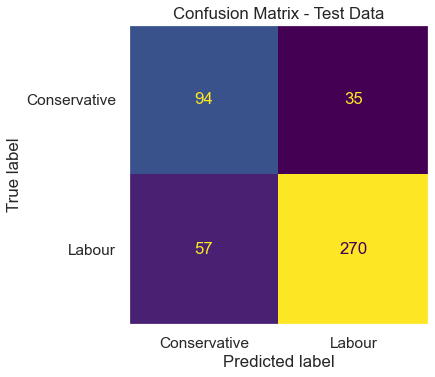

In [150]:
plot_confusion_matrix(logit_smote_model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [151]:
# test data accuracy
logit_sm_test_acc=logit_smote_model.score(X_test,y_test)
logit_sm_test_acc.round(2)

0.8

In [152]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       129
           1       0.89      0.83      0.85       327

    accuracy                           0.80       456
   macro avg       0.75      0.78      0.76       456
weighted avg       0.81      0.80      0.80       456



In [153]:
logit_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).round(2).T
df

precision  recall  f1-score  support
0                  0.62    0.73      0.67    129.0
1                  0.89    0.83      0.85    327.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.75    0.78      0.76    456.0
weighted avg       0.81    0.80      0.80    456.0

In [154]:
logit_test_precision_conservative=df.loc['0'][0]
print('logit_test_precision_conservative',logit_test_precision_conservative)
logit_test_recall_conservative=df.loc['0'][1]
print('logit_test_recall_conservative',logit_test_recall_conservative)
logit_test_f1_conservative=df.loc['0'][2]
print('logit_test_f1_conservative',logit_test_f1_conservative)
logit_test_precision_labour=df.loc['1'][0]
print('logit_test_precision_labour',logit_test_precision_labour)
logit_test_recall_labour=df.loc['1'][1]
print('logit_test_recall_labour',logit_test_recall_labour)
logit_test_f1_labour=df.loc['1'][2]
print('logit_test_f1_labour',logit_test_f1_labour)

logit_test_precision_conservative 0.62
logit_test_recall_conservative 0.73
logit_test_f1_conservative 0.67
logit_test_precision_labour 0.89
logit_test_recall_labour 0.83
logit_test_f1_labour 0.85


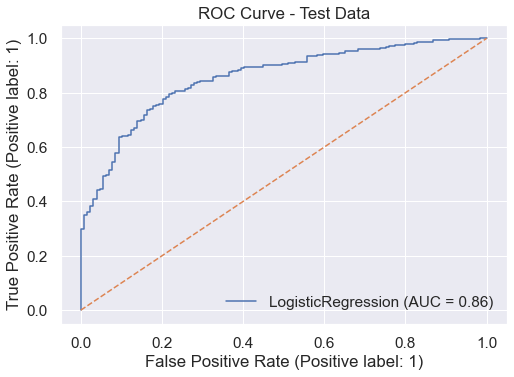

In [155]:
plot_roc_curve(logit_smote_model,X_test,y_test)
plt.title('ROC Curve - Test Data')
plt.plot([0,1],[0,1],linestyle='--');

### Train And Test ROC Comaprison

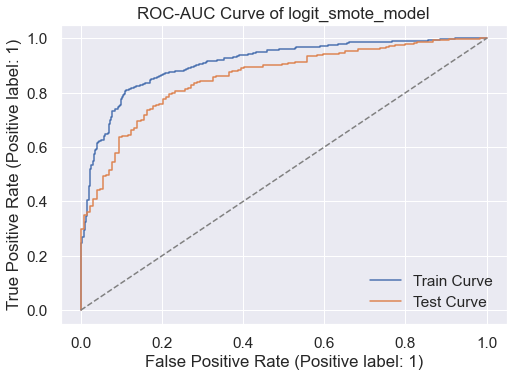

In [156]:
fig,ax=plt.subplots()
plot_roc_curve(logit_smote_model,X_train_smote,y_train_smote,ax=ax,label='Train Curve')
plot_roc_curve(logit_smote_model,X_test,y_test,ax=ax,label='Test Curve')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve of logit_smote_model');

### LDA with smote

In [157]:
lda_smote_model=LinearDiscriminantAnalysis()
lda_smote_model.fit(X_train_smote,y_train_smote)

LinearDiscriminantAnalysis()

In [158]:
ytrain_predict=lda_smote_model.predict(X_train_smote)
ytest_predict=lda_smote_model.predict(X_test)

### Confusion Matrix For Train Data

In [159]:
confusion_matrix(y_train_smote,ytrain_predict)

array([[622, 108],
       [125, 605]], dtype=int64)

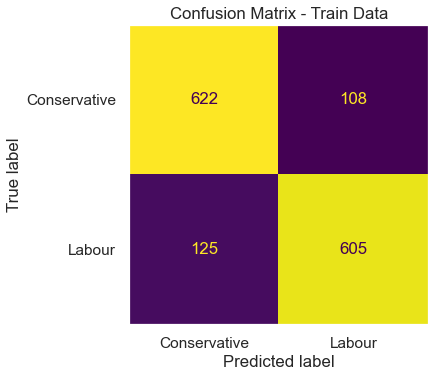

In [160]:
plot_confusion_matrix(lda_smote_model,X_train_smote,y_train_smote,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Train Data');

In [161]:
# train data accuracy
lda_sm_train_acc=lda_smote_model.score(X_train_smote,y_train_smote)
lda_sm_train_acc.round(2)

0.84

In [162]:
print(classification_report(y_train_smote,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       730
           1       0.85      0.83      0.84       730

    accuracy                           0.84      1460
   macro avg       0.84      0.84      0.84      1460
weighted avg       0.84      0.84      0.84      1460



In [163]:
lda_metrics=classification_report(y_train_smote,ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).round(2).T
df

precision  recall  f1-score  support
0                  0.83    0.85      0.84   730.00
1                  0.85    0.83      0.84   730.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.84    0.84      0.84  1460.00
weighted avg       0.84    0.84      0.84  1460.00

In [164]:
lda_train_precision_conservative=df.loc['0'][0]
print('lda_train_precision_conservative',lda_train_precision_conservative)
lda_train_recall_conservative=df.loc['0'][1]
print('lda_train_recall_conservative',lda_train_recall_conservative)
lda_train_f1_conservative=df.loc['0'][2]
print('lda_train_f1_conservative',lda_train_f1_conservative)
lda_test_precision_labour=df.loc['1'][0]
print('lda_test_precision_labour',lda_test_precision_labour)
lda_test_recall_labour=df.loc['1'][1]
print('lda_test_recall_labour',lda_test_recall_labour)
lda_test_f1_labour=df.loc['1'][2]
print('lda_test_f1_labour',lda_test_f1_labour)

lda_train_precision_conservative 0.83
lda_train_recall_conservative 0.85
lda_train_f1_conservative 0.84
lda_test_precision_labour 0.85
lda_test_recall_labour 0.83
lda_test_f1_labour 0.84


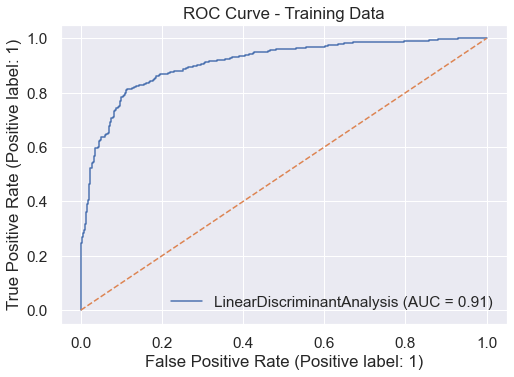

In [165]:
plot_roc_curve(lda_smote_model,X_train_smote,y_train_smote)
plt.title('ROC Curve - Training Data')
plt.plot([0,1],[0,1],linestyle='--');

### Confusion Matrix For Test Data

In [166]:
confusion_matrix(y_test,ytest_predict)

array([[ 94,  35],
       [ 58, 269]], dtype=int64)

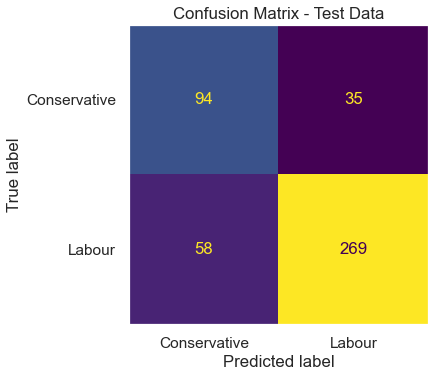

In [167]:
plot_confusion_matrix(lda_smote_model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [168]:
# Test Data Accuracy
lda_sm_test_acc=lda_smote_model.score(X_test,y_test)
lda_sm_test_acc.round(2)

0.8

In [169]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       129
           1       0.88      0.82      0.85       327

    accuracy                           0.80       456
   macro avg       0.75      0.78      0.76       456
weighted avg       0.81      0.80      0.80       456



In [170]:
lda_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).round(2).T
df

precision  recall  f1-score  support
0                  0.62    0.73      0.67    129.0
1                  0.88    0.82      0.85    327.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.75    0.78      0.76    456.0
weighted avg       0.81    0.80      0.80    456.0

In [171]:
lda_test_precision_conservative=df.loc['0'][0]
print('lda_test_precision_conservative',lda_test_precision_conservative)
lda_test_recall_conservative=df.loc['0'][1]
print('lda_test_recall_conservative',lda_test_recall_conservative)
lda_test_f1_conservative=df.loc['0'][2]
print('lda_test_f1_conservative',lda_test_f1_conservative)
lda_test_precision_labour=df.loc['1'][0]
print('lda_test_precision_labour',lda_test_precision_labour)
lda_test_recall_labour=df.loc['1'][1]
print('lda_test_recall_labour',lda_test_recall_labour)
lda_test_f1_labour=df.loc['1'][2]
print('lda_test_f1_labour',lda_test_f1_labour)

lda_test_precision_conservative 0.62
lda_test_recall_conservative 0.73
lda_test_f1_conservative 0.67
lda_test_precision_labour 0.88
lda_test_recall_labour 0.82
lda_test_f1_labour 0.85


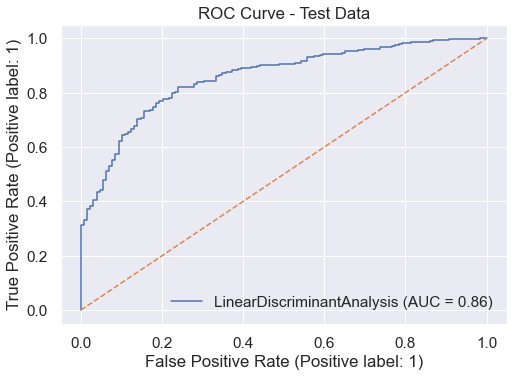

In [172]:
plot_roc_curve(lda_smote_model,X_test,y_test)
plt.title('ROC Curve - Test Data')
plt.plot([0,1],[0,1],linestyle='--');

### Comparison

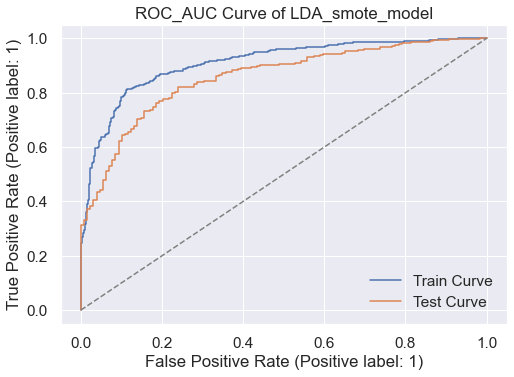

In [173]:
fig,ax=plt.subplots()
plot_roc_curve(lda_smote_model,X_train_smote,y_train_smote,ax=ax,label='Train Curve')
plot_roc_curve(lda_smote_model,X_test,y_test,ax=ax,label='Test Curve')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC_AUC Curve of LDA_smote_model');

### KNN with Smote

In [174]:
knn_smote_model=KNeighborsClassifier()
knn_smote_model.fit(X_train_smote,y_train_smote)

KNeighborsClassifier()

In [175]:
ytrain_predict=knn_smote_model.predict(X_train_smote)
ytest_predict=knn_smote_model.predict(X_test)

### Confusion Matrix for Train Data

In [176]:
confusion_matrix(y_train_smote,ytrain_predict)

array([[705,  25],
       [127, 603]], dtype=int64)

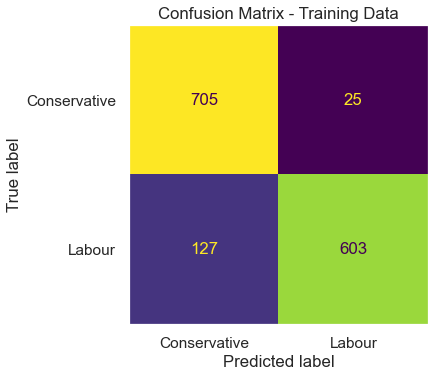

In [177]:
plot_confusion_matrix(knn_smote_model,X_train_smote,y_train_smote,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Training Data');

In [178]:
# train Data accuracy
knn_sm_train_acc=knn_smote_model.score(X_train_smote,y_train_smote)
knn_sm_train_acc.round(2)

0.9

In [179]:
print(classification_report(y_train_smote,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       730
           1       0.96      0.83      0.89       730

    accuracy                           0.90      1460
   macro avg       0.90      0.90      0.90      1460
weighted avg       0.90      0.90      0.90      1460



In [180]:
knn_metrics=classification_report(y_train_smote,ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).round(2).T
df

precision  recall  f1-score  support
0                  0.85    0.97      0.90    730.0
1                  0.96    0.83      0.89    730.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.90    0.90      0.90   1460.0
weighted avg       0.90    0.90      0.90   1460.0

In [181]:
knn_train_precision_conservative=df.loc['0'][0]
print('knn_train_precision_conservative',knn_train_precision_conservative)
knn_train_recall_conservative=df.loc['0'][1]
print('knn_train_recall_conservative',knn_train_recall_conservative)
knn_train_f1_conservative=df.loc['0'][2]
print('knn_train_f1_conservative',knn_train_f1_conservative)
knn_train_precision_labour=df.loc['1'][0]
print('knn_train_precision_labour',knn_train_precision_labour)
knn_train_recall_labour=df.loc['1'][1]
print('knn_train_recall_labour',knn_train_recall_labour)
knn_train_f1_labour=df.loc['1'][2]
print('knn_train_f1_labour',knn_train_f1_labour)

knn_train_precision_conservative 0.85
knn_train_recall_conservative 0.97
knn_train_f1_conservative 0.9
knn_train_precision_labour 0.96
knn_train_recall_labour 0.83
knn_train_f1_labour 0.89


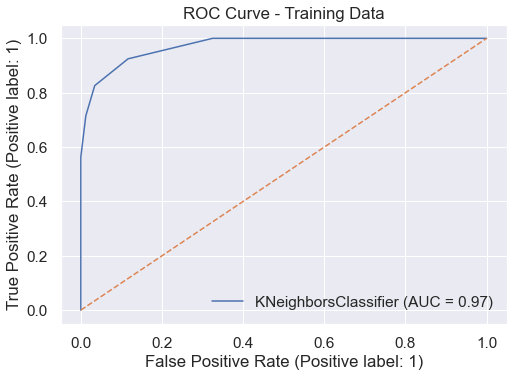

In [182]:
plot_roc_curve(knn_smote_model,X_train_smote,y_train_smote)
plt.title('ROC Curve - Training Data')
plt.plot([0,1],[0,1],linestyle='--');

### Confusion Matrix Test Data

In [183]:
confusion_matrix(y_test,ytest_predict)

array([[ 94,  35],
       [ 82, 245]], dtype=int64)

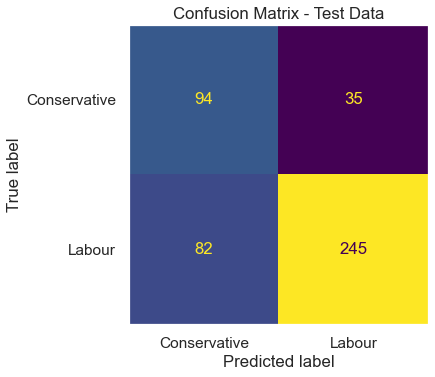

In [184]:
plot_confusion_matrix(knn_smote_model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [185]:
# test data accuracy
knn_sm_test_acc=knn_smote_model.score(X_test,y_test)
knn_sm_test_acc.round(2)

0.74

In [186]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.53      0.73      0.62       129
           1       0.88      0.75      0.81       327

    accuracy                           0.74       456
   macro avg       0.70      0.74      0.71       456
weighted avg       0.78      0.74      0.75       456



In [187]:
knn_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).round(2).T
df

precision  recall  f1-score  support
0                  0.53    0.73      0.62   129.00
1                  0.88    0.75      0.81   327.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.70    0.74      0.71   456.00
weighted avg       0.78    0.74      0.75   456.00

In [188]:
knn_test_precision_conservative=df.loc['0'][0]
print('knn_test_precision_conservative',knn_test_precision_conservative)
knn_test_recall_conservative=df.loc['0'][1]
print('knn_test_recall_conservative',knn_test_recall_conservative)
knn_test_f1_conservative=df.loc['0'][2]
print('knn_test_f1_conservative',knn_test_f1_conservative)
knn_test_precision_labour=df.loc['1'][0]
print('knn_test_precision_labour',knn_test_precision_labour)
knn_test_recall_labour=df.loc['1'][1]
print('knn_test_recall_labour',knn_test_recall_labour)
knn_test_f1_labour=df.loc['1'][2]
print('knn_test_f1_labour',knn_test_f1_labour)

knn_test_precision_conservative 0.53
knn_test_recall_conservative 0.73
knn_test_f1_conservative 0.62
knn_test_precision_labour 0.88
knn_test_recall_labour 0.75
knn_test_f1_labour 0.81


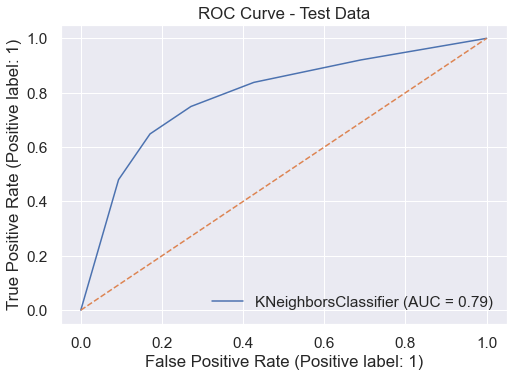

In [189]:
plot_roc_curve(knn_smote_model,X_test,y_test)
plt.title('ROC Curve - Test Data')
plt.plot([0,1],[0,1],linestyle='--');

### Comparison ROC Curve

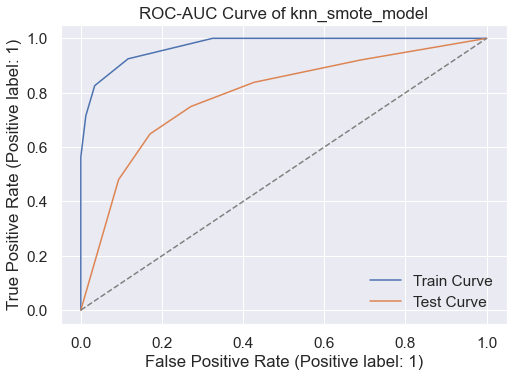

In [190]:
fig,ax=plt.subplots()
plot_roc_curve(knn_smote_model,X_train_smote,y_train_smote,ax=ax,label='Train Curve')
plot_roc_curve(knn_smote_model,X_test,y_test,ax=ax,label='Test Curve')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve of knn_smote_model');

### Naive Bayes Model with Smote

In [191]:
nb_smote_model=GaussianNB()
nb_smote_model.fit(X_train_smote,y_train_smote)

GaussianNB()

In [192]:
ytrain_predict=nb_smote_model.predict(X_train_smote)
ytest_predict=nb_smote_model.predict(X_test)

### Confusion Matrix For Training Data

In [193]:
confusion_matrix(y_train_smote,ytrain_predict)

array([[614, 116],
       [122, 608]], dtype=int64)

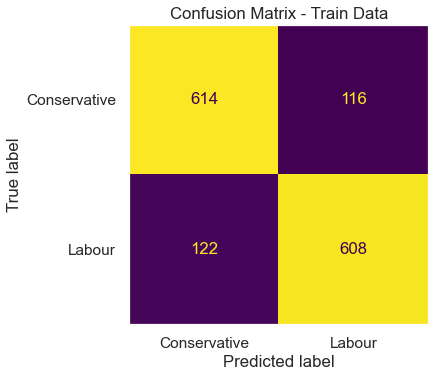

In [194]:
plot_confusion_matrix(nb_smote_model,X_train_smote,y_train_smote,colorbar=False)
plt.title('Confusion Matrix - Train Data')
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.grid(False);

In [195]:
# train accuracy
nb_sm_train_acc=nb_smote_model.score(X_train_smote,y_train_smote)
nb_sm_train_acc.round(2)

0.84

In [196]:
print(classification_report(y_train_smote,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       730
           1       0.84      0.83      0.84       730

    accuracy                           0.84      1460
   macro avg       0.84      0.84      0.84      1460
weighted avg       0.84      0.84      0.84      1460



In [197]:
nb_metrics=classification_report(y_train_smote,ytrain_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).round(2).T
df

precision  recall  f1-score  support
0                  0.83    0.84      0.84   730.00
1                  0.84    0.83      0.84   730.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.84    0.84      0.84  1460.00
weighted avg       0.84    0.84      0.84  1460.00

In [198]:
nb_train_precision_conservative=df.loc['0'][0]
print('nb_train_precision_conservative',nb_train_precision_conservative)
nb_train_recall_conservative=df.loc['0'][1]
print('nb_train_recall_conservative',nb_train_recall_conservative)
nb_train_f1_conservative=df.loc['0'][2]
print('nb_train_f1_conservative',nb_train_f1_conservative)
nb_train_precision_labour=df.loc['1'][0]
print('nb_train_precision_labour',nb_train_precision_labour)
nb_train_recall_labour=df.loc['1'][1]
print('nb_train_recall_labour',nb_train_recall_labour)
nb_train_f1_labour=df.loc['1'][2]
print('nb_train_f1_labour',nb_train_f1_labour)

nb_train_precision_conservative 0.83
nb_train_recall_conservative 0.84
nb_train_f1_conservative 0.84
nb_train_precision_labour 0.84
nb_train_recall_labour 0.83
nb_train_f1_labour 0.84


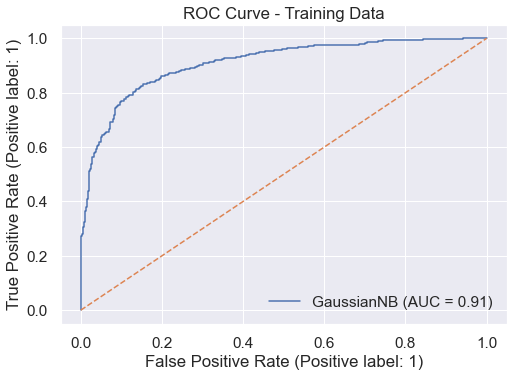

In [199]:
plot_roc_curve(nb_smote_model,X_train_smote,y_train_smote)
plt.title('ROC Curve - Training Data')
plt.plot([0,1],[0,1],linestyle='--');

### Confusion Matrix For Test Data

In [200]:
confusion_matrix(y_test,ytest_predict)

array([[ 93,  36],
       [ 56, 271]], dtype=int64)

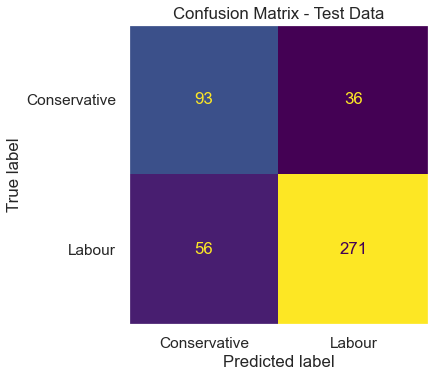

In [201]:
plot_confusion_matrix(nb_smote_model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [202]:
# test accuracy
nb_sm_test_acc=nb_smote_model.score(X_test,y_test)
nb_sm_test_acc.round(2)

0.8

In [203]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       129
           1       0.88      0.83      0.85       327

    accuracy                           0.80       456
   macro avg       0.75      0.77      0.76       456
weighted avg       0.81      0.80      0.80       456



In [204]:
nb_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).round(2).T
df

precision  recall  f1-score  support
0                  0.62    0.72      0.67    129.0
1                  0.88    0.83      0.85    327.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.75    0.77      0.76    456.0
weighted avg       0.81    0.80      0.80    456.0

In [205]:
nb_test_precision_conservative=df.loc['0'][0]
print('nb_test_precision_conservative',nb_test_precision_conservative)
nb_test_recall_conservative=df.loc['0'][1]
print('nb_test_recall_conservative',nb_test_recall_conservative)
nb_test_f1_conservative=df.loc['0'][2]
print('nb_test_f1_conservative',nb_test_f1_conservative)
nb_test_precision_labour=df.loc['1'][0]
print('nb_test_precision_labour',nb_test_precision_labour)
nb_test_recall_labour=df.loc['1'][1]
print('nb_test_recall_labour',nb_test_recall_labour)
nb_test_f1_labour=df.loc['1'][2]
print('nb_test_f1_labour',nb_test_f1_labour)

nb_test_precision_conservative 0.62
nb_test_recall_conservative 0.72
nb_test_f1_conservative 0.67
nb_test_precision_labour 0.88
nb_test_recall_labour 0.83
nb_test_f1_labour 0.85


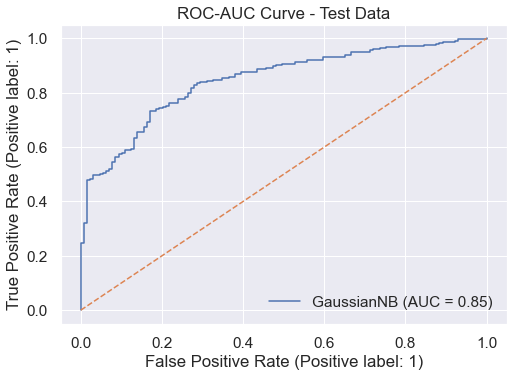

In [206]:
plot_roc_curve(nb_smote_model,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Test Data');

### COMPARISON

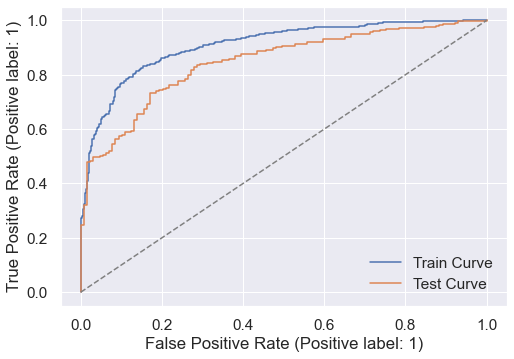

In [207]:
fig,ax=plt.subplots()
plot_roc_curve(nb_smote_model,X_train_smote,y_train_smote,label='Train Curve',ax=ax)
plot_roc_curve(nb_smote_model,X_test,y_test,label='Test Curve',ax=ax)
plt.plot([0,1],[0,1],linestyle='--',color='grey');

### Hyperparameter tuning using GridsearchCV

### Logistic Regression with GridSearchCV

In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
class_weight=dict({0:2,1:1})
clf=LogisticRegression(class_weight=class_weight)
grid_values={'penalty':['l2','none','elasticnet'],
            'C':np.logspace(-3,3,20),
            'solver':['newton-cg','lbfgs','sag','saga','liblinear']}
logit_grid_model=GridSearchCV(clf,param_grid=grid_values,cv=10,n_jobs=-1)
logit_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']})

In [210]:
print('Best Parameters from',logit_grid_model.best_estimator_)

Best Parameters from LogisticRegression(C=0.6951927961775606, class_weight={0: 2, 1: 1},
                   solver='liblinear')


In [211]:
logit_grid_model.best_params_

{'C': 0.6951927961775606, 'penalty': 'l2', 'solver': 'liblinear'}

In [212]:
best_logit_grid=logit_grid_model.best_estimator_

In [213]:
best_logit_grid

LogisticRegression(C=0.6951927961775606, class_weight={0: 2, 1: 1},
                   solver='liblinear')

In [214]:
feature_rank=pd.DataFrame({'Feature':X_train.columns,'Importance':best_logit_grid.coef_[0]})
feature_rank=feature_rank.sort_values('Importance',ascending=False).reset_index(drop=True)
feature_rank.round(2)

Feature  Importance
0                    Blair        0.76
1   economic.cond.national        0.43
2  economic.cond.household        0.31
3                   gender        0.12
4                      age       -0.02
5                   Europe       -0.20
6      political.knowledge       -0.36
7                    Hague       -0.85

In [215]:
ytrain_predict=best_logit_grid.predict(X_train)
ytest_predict=best_logit_grid.predict(X_test)

### Confusion Matrix For train data

In [216]:
confusion_matrix(y_train,ytrain_predict)

array([[270,  61],
       [118, 612]], dtype=int64)

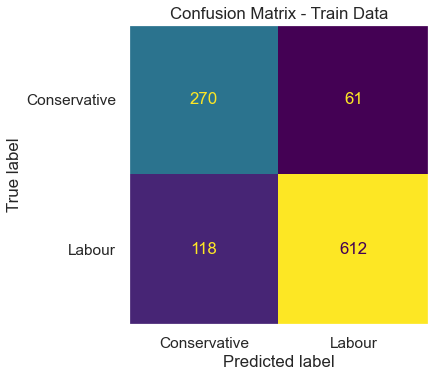

In [217]:
plot_confusion_matrix(best_logit_grid,X_train,y_train,colorbar=False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.grid(False)
plt.title('Confusion Matrix - Train Data');

In [218]:
logit_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df_logit_train=pd.DataFrame(logit_metrics).round(2).T
df_logit_train

precision  recall  f1-score  support
0                  0.70    0.82      0.75   331.00
1                  0.91    0.84      0.87   730.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.80    0.83      0.81  1061.00
weighted avg       0.84    0.83      0.83  1061.00

AUC:0.90


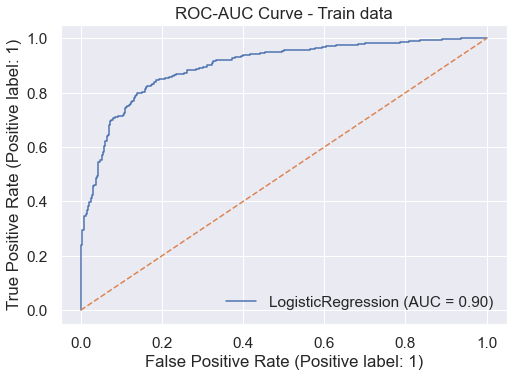

In [219]:
probs=best_logit_grid.predict_proba(X_train)
probs=probs[:,1]
logit_train_auc=roc_auc_score(y_train,probs)
print('AUC:%.2f'% logit_train_auc)
plot_roc_curve(best_logit_grid,X_train,y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Train data');

### Confusion Matrix Test data

In [220]:
confusion_matrix(y_test,ytest_predict)

array([[ 95,  34],
       [ 54, 273]], dtype=int64)

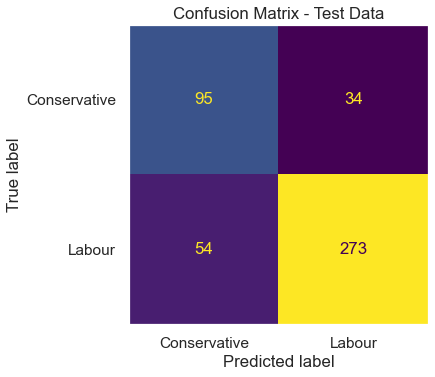

In [221]:
plot_confusion_matrix(best_logit_grid,X_test,y_test,colorbar=False)
classNames = ['Conservative', 'Labour']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks,classNames)
plt.grid(False)
plt.title('Confusion Matrix - Test Data');

In [222]:
logit_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df_logit_test=pd.DataFrame(logit_metrics).round(2).T
df_logit_test

precision  recall  f1-score  support
0                  0.64    0.74      0.68   129.00
1                  0.89    0.83      0.86   327.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.76    0.79      0.77   456.00
weighted avg       0.82    0.81      0.81   456.00

AUC:0.86


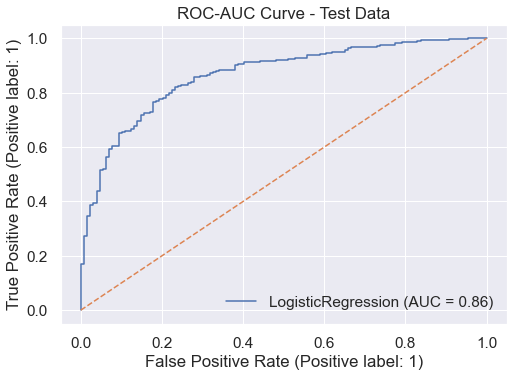

In [223]:
probs=best_logit_grid.predict_proba(X_test)
probs=probs[:,1]
logit_test_auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'% logit_test_auc)
plot_roc_curve(best_logit_grid,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Test Data');

### Comparison

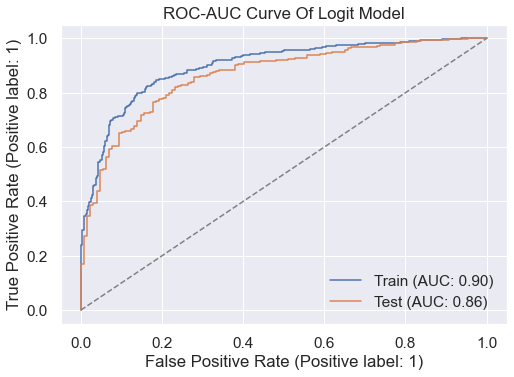

In [224]:
fig,ax=plt.subplots()
plot_roc_curve(best_logit_grid,X_train,y_train,ax=ax,label='Train (AUC: %0.2f)'% logit_train_auc)
plot_roc_curve(best_logit_grid,X_test,y_test,ax=ax,label='Test (AUC: %0.2f)'% logit_test_auc)
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve Of Logit Model');

### Linear Discriminant Analysis with GridsearchCV

In [225]:
clf=LinearDiscriminantAnalysis()
grid_values={'solver':['svd','lsqr','eigen'],
            'tol':[0.00001,0.0001,0.001,0.01]}
lda_grid_model=GridSearchCV(clf,param_grid=grid_values,cv=3)
lda_grid_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01]})

In [226]:
lda_grid_model.best_params_

{'solver': 'svd', 'tol': 1e-05}

In [227]:
best_lda_grid=lda_grid_model.best_estimator_

In [228]:
best_lda_grid

LinearDiscriminantAnalysis(tol=1e-05)

In [229]:
ytrain_predict=best_lda_grid.predict(X_train)
ytest_predict=best_lda_grid.predict(X_test)

### Confusion Matrix For Training data

In [230]:
confusion_matrix(y_train,ytrain_predict)

array([[227, 104],
       [ 72, 658]], dtype=int64)

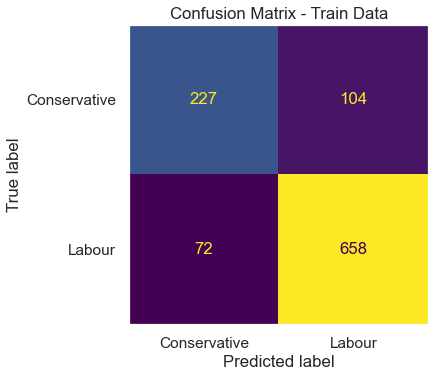

In [231]:
plot_confusion_matrix(best_lda_grid,X_train,y_train,colorbar=False)
plt.grid(False)
classNames=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Train Data');

In [232]:
lda_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df_lda_train=pd.DataFrame(lda_metrics).round(2).T
df_lda_train

precision  recall  f1-score  support
0                  0.76    0.69      0.72   331.00
1                  0.86    0.90      0.88   730.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.81    0.79      0.80  1061.00
weighted avg       0.83    0.83      0.83  1061.00

In [233]:
best_lda_grid.score(X_train,y_train).round(2)

0.83

AUC:0.90


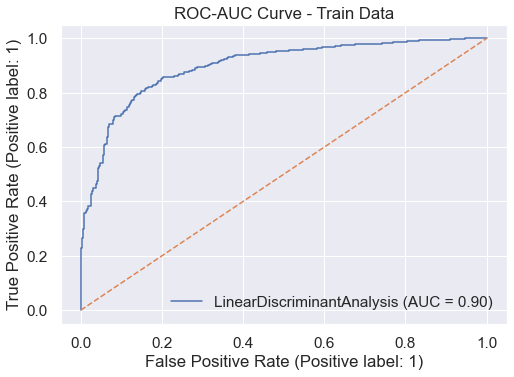

In [234]:
probs=best_lda_grid.predict_proba(X_train)
probs=probs[:,1]
lda_train_auc=roc_auc_score(y_train,probs)
print('AUC:%.2f'% lda_train_auc)
plot_roc_curve(best_lda_grid,X_train,y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Train Data');

### Confusion Matrix Test Data

In [235]:
confusion_matrix(y_test,ytest_predict)

array([[ 83,  46],
       [ 36, 291]], dtype=int64)

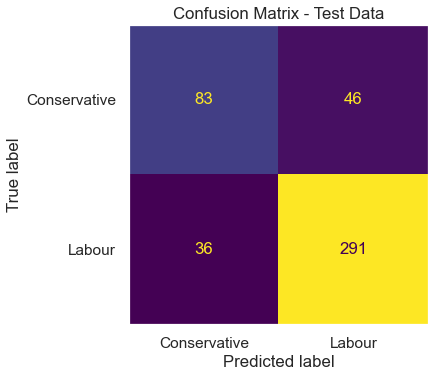

In [236]:
plot_confusion_matrix(best_lda_grid,X_test,y_test,colorbar=False)
plt.grid(False)
classNames=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [237]:
best_lda_grid.score(X_test,y_test).round(2)

0.82

In [238]:
lda_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df_lda_test=pd.DataFrame(lda_metrics).round(2).T
df_lda_test

precision  recall  f1-score  support
0                  0.70    0.64      0.67   129.00
1                  0.86    0.89      0.88   327.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.78    0.77      0.77   456.00
weighted avg       0.82    0.82      0.82   456.00

AUC:0.87


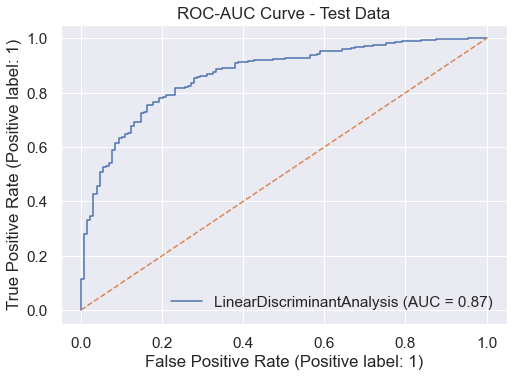

In [239]:
probs=best_lda_grid.predict_proba(X_test)
probs=probs[:,1]
lda_test_auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'% lda_test_auc)
plot_roc_curve(best_lda_grid,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Test Data');

### Comparison

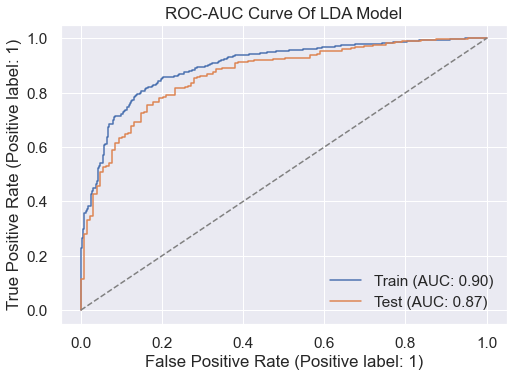

In [240]:
fig,ax=plt.subplots()
plot_roc_curve(best_lda_grid,X_train,y_train,ax=ax,label='Train (AUC: %0.2f)'% lda_train_auc)
plot_roc_curve(best_lda_grid,X_test,y_test,ax=ax,label='Test (AUC: %0.2f)'% lda_test_auc)
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve Of LDA Model');

### KNN Model with GridsearchCV

In [241]:
clf=KNeighborsClassifier()
grid_values={'n_neighbors':range(5,20),
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidean','canberra','manhattan']}
knn_grid_model=GridSearchCV(clf,param_grid=grid_values,cv=20)
knn_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra',
                                    'manhattan'],
                         'n_neighbors': range(5, 20),
                         'weights': ['uniform', 'distance']})

In [242]:
knn_grid_model.best_params_

{'metric': 'canberra', 'n_neighbors': 5, 'weights': 'uniform'}

In [243]:
best_knn_grid=knn_grid_model.best_estimator_

In [244]:
best_knn_grid

KNeighborsClassifier(metric='canberra')

In [245]:
ytrain_predict=best_knn_grid.predict(X_train_scaled)
ytest_predict=best_knn_grid.predict(X_test_scaled)

### Confusion Matrix Train Data

In [246]:
confusion_matrix(y_train,ytrain_predict)

array([[255,  76],
       [ 61, 669]], dtype=int64)

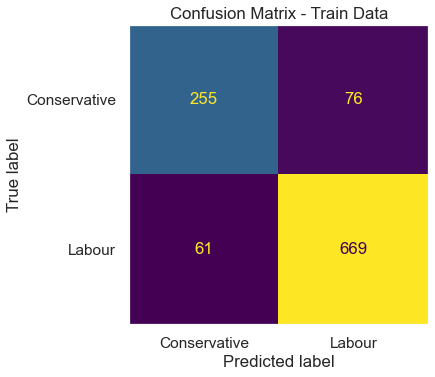

In [247]:
plot_confusion_matrix(best_knn_grid,X_train_scaled,y_train,colorbar=False)
plt.grid(False)
classNames=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Train Data');

In [248]:
best_knn_grid.score(X_train_scaled,y_train).round(2)

0.87

In [249]:
knn_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df_knn_train=pd.DataFrame(knn_metrics).round(2).T
df_knn_train

precision  recall  f1-score  support
0                  0.81    0.77      0.79   331.00
1                  0.90    0.92      0.91   730.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.85    0.84      0.85  1061.00
weighted avg       0.87    0.87      0.87  1061.00

AUC:0.94


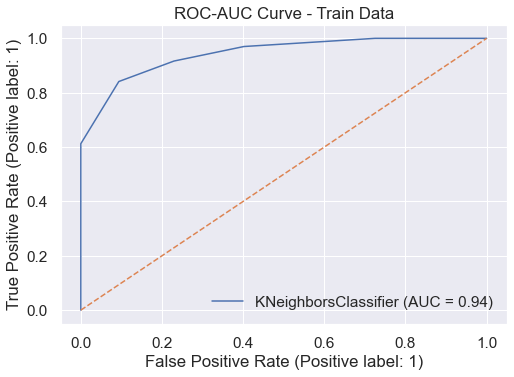

In [250]:
probs=best_knn_grid.predict_proba(X_train_scaled)
probs=probs[:,1]
knn_train_auc=roc_auc_score(y_train,probs)
print('AUC:%.2f'% knn_train_auc)
plot_roc_curve(best_knn_grid,X_train_scaled,y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Train Data');

### Confusion Matrix Test Data

In [251]:
confusion_matrix(y_test,ytest_predict)

array([[ 86,  43],
       [ 44, 283]], dtype=int64)

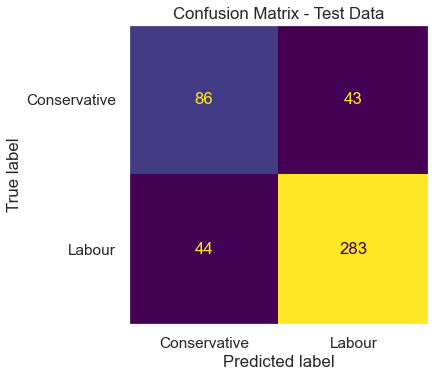

In [252]:
plot_confusion_matrix(best_knn_grid,X_test_scaled,y_test,colorbar=False)
plt.grid(False)
classNames=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [253]:
best_knn_grid.score(X_test_scaled,y_test).round(2)

0.81

In [254]:
knn_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df_knn_test=pd.DataFrame(knn_metrics).round(2).T
df_knn_test

precision  recall  f1-score  support
0                  0.66    0.67      0.66   129.00
1                  0.87    0.87      0.87   327.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.76    0.77      0.77   456.00
weighted avg       0.81    0.81      0.81   456.00

AUC:0.84


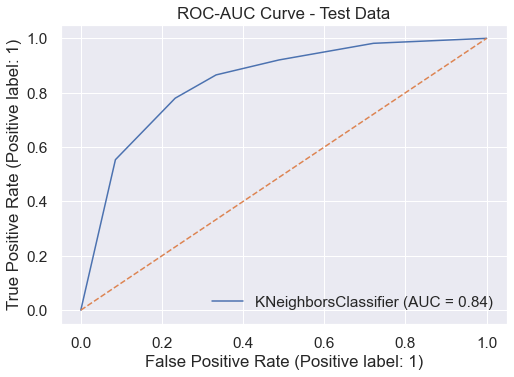

In [255]:
probs=best_knn_grid.predict_proba(X_test_scaled)
probs=probs[:,1]
knn_test_auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'% knn_test_auc)
plot_roc_curve(best_knn_grid,X_test_scaled,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Test Data');

### Comparison

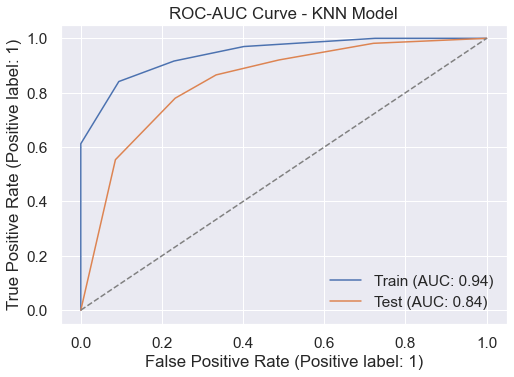

In [256]:
fig,ax=plt.subplots()
plot_roc_curve(best_knn_grid,X_train_scaled,y_train,ax=ax,label='Train (AUC: %0.2f)'% knn_train_auc)
plot_roc_curve(best_knn_grid,X_test_scaled,y_test,ax=ax,label='Test (AUC: %0.2f)'% knn_test_auc)
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve - KNN Model');

### Bagging using RandomForest

In [257]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
class_weight=dict({0:4,1:1.5})
rfcl=RandomForestClassifier(class_weight=class_weight,min_samples_leaf=2,min_samples_split=4)
bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1234)
bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1234)

In [258]:
ytrain_predict=bagging_model.predict(X_train)
ytest_predict=bagging_model.predict(X_test)

### Confusion Matrix Train Data

In [259]:
confusion_matrix(y_train,ytrain_predict)

array([[298,  33],
       [ 64, 666]], dtype=int64)

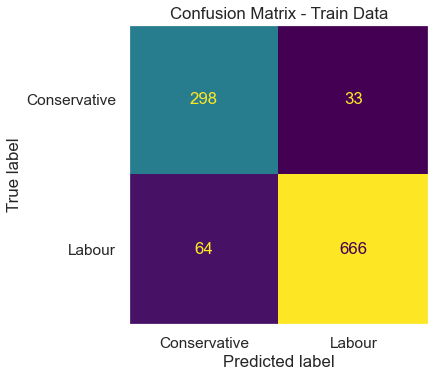

In [260]:
plot_confusion_matrix(bagging_model,X_train,y_train,colorbar=False)
plt.grid(False)
classNamesa=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Train Data');

In [261]:
bagging_model.score(X_train,y_train).round(2)

0.91

In [262]:
bagging_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df_bag_rf_train=pd.DataFrame(bagging_metrics).round(2).T
df_bag_rf_train

precision  recall  f1-score  support
0                  0.82    0.90      0.86   331.00
1                  0.95    0.91      0.93   730.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.89    0.91      0.90  1061.00
weighted avg       0.91    0.91      0.91  1061.00

AUC:0.97


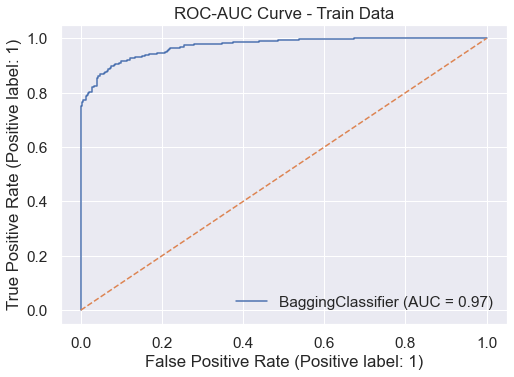

In [263]:
probs=bagging_model.predict_proba(X_train)
probs=probs[:,1]
bagg_train_auc=roc_auc_score(y_train,probs)
print('AUC:%.2f'% bagg_train_auc)
plot_roc_curve(bagging_model,X_train,y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Train Data');

### Confusion Matrix Test Data

In [264]:
confusion_matrix(y_test,ytest_predict)

array([[ 93,  36],
       [ 48, 279]], dtype=int64)

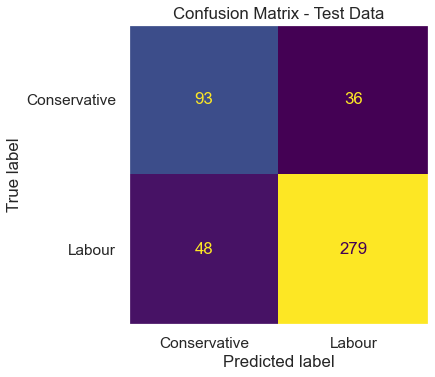

In [265]:
plot_confusion_matrix(bagging_model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [266]:
bagging_model.score(X_test,y_test).round(2)

0.82

In [267]:
bagging_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df_bag_rf_test=pd.DataFrame(bagging_metrics).round(2).T
df_bag_rf_test

precision  recall  f1-score  support
0                  0.66    0.72      0.69   129.00
1                  0.89    0.85      0.87   327.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.77    0.79      0.78   456.00
weighted avg       0.82    0.82      0.82   456.00

AUC:0.88


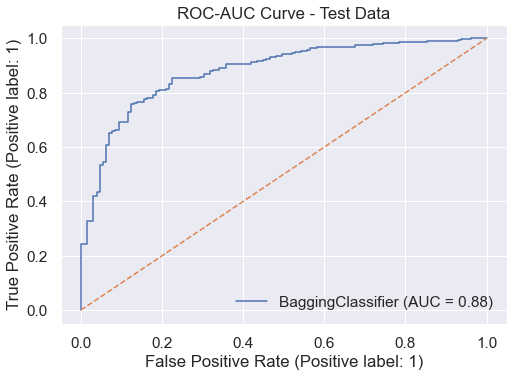

In [268]:
probs=bagging_model.predict_proba(X_test)
probs=probs[:,1]
bagg_test_auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'% bagg_test_auc)
plot_roc_curve(bagging_model,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Test Data');

### Comparison

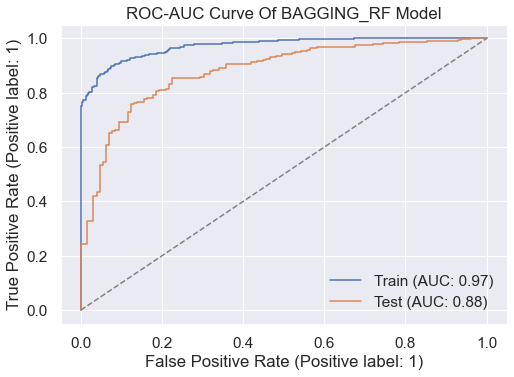

In [269]:
fig,ax=plt.subplots()
plot_roc_curve(bagging_model,X_train,y_train,ax=ax,label='Train (AUC: %0.2f)'% bagg_train_auc)
plot_roc_curve(bagging_model,X_test,y_test,ax=ax,label='Test (AUC: %0.2f)'% bagg_test_auc)
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve Of BAGGING_RF Model');

### Ada Boost

In [270]:
from sklearn.ensemble import AdaBoostClassifier

In [271]:
adb_model=AdaBoostClassifier(n_estimators=100,random_state=1234)
adb_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1234)

In [272]:
ytrain_predict=adb_model.predict(X_train)
ytest_predict=adb_model.predict(X_test)

### Training Performance

In [273]:
confusion_matrix(y_train,ytrain_predict)

array([[235,  96],
       [ 66, 664]], dtype=int64)

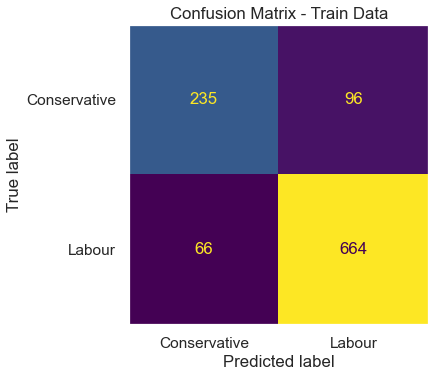

In [274]:
plot_confusion_matrix(adb_model,X_train,y_train,colorbar=False)
plt.grid(False)
classNames=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Train Data');

In [275]:
adb_model.score(X_train,y_train).round(2)

0.85

In [276]:
adb_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df_adb_train=pd.DataFrame(adb_metrics).round(2).T
df_adb_train

precision  recall  f1-score  support
0                  0.78    0.71      0.74   331.00
1                  0.87    0.91      0.89   730.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.83    0.81      0.82  1061.00
weighted avg       0.84    0.85      0.85  1061.00

AUC:0.92


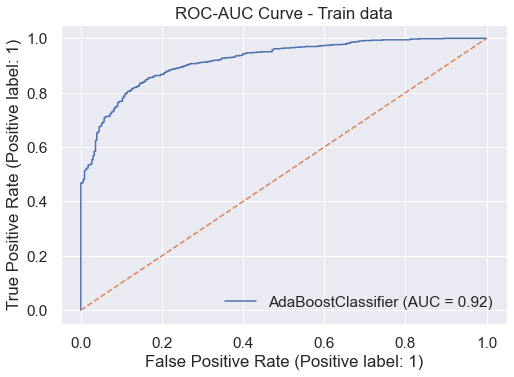

In [277]:
probs=adb_model.predict_proba(X_train)
probs=probs[:,1]
adb_train_auc=roc_auc_score(y_train,probs)
print('AUC:%.2f'% adb_train_auc)
plot_roc_curve(adb_model,X_train,y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Train data');

### Test Data Performance

In [278]:
confusion_matrix(y_test,ytest_predict)

array([[ 84,  45],
       [ 45, 282]], dtype=int64)

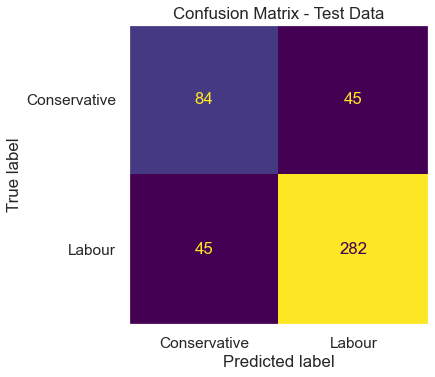

In [279]:
plot_confusion_matrix(adb_model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames=['Conservative','Labour']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [280]:
adb_model.score(X_test,y_test).round(2)

0.8

In [281]:
adb_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df_adb_test=pd.DataFrame(adb_metrics).round(2).T
df_adb_test

precision  recall  f1-score  support
0                  0.65    0.65      0.65    129.0
1                  0.86    0.86      0.86    327.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.76    0.76      0.76    456.0
weighted avg       0.80    0.80      0.80    456.0

AUC:0.84


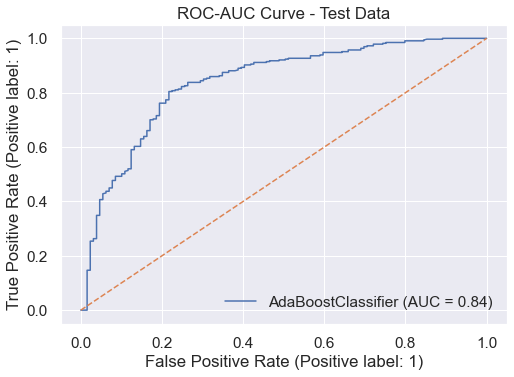

In [282]:
probs=adb_model.predict_proba(X_test)
probs=probs[:,1]
adb_test_auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'% adb_test_auc)
plot_roc_curve(adb_model,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Test Data');

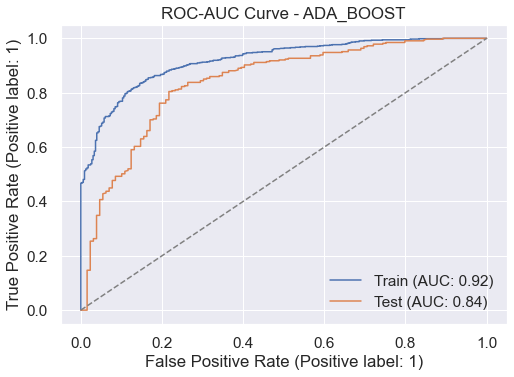

In [283]:
fig,ax=plt.subplots()
plot_roc_curve(adb_model,X_train,y_train,ax=ax,label='Train (AUC: %0.2f)'% adb_train_auc)
plot_roc_curve(adb_model,X_test,y_test,ax=ax,label='Test (AUC: %0.2f)'% adb_test_auc)
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve - ADA_BOOST');

### Gradient Boosting Classifier

In [284]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(n_estimators=500,max_depth=10,random_state=1234)
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=1234)

In [285]:
ytrain_predict=gbc_model.predict(X_train)
ytest_predict=gbc_model.predict(X_test)

### Training Performance

In [286]:
confusion_matrix(y_train,ytrain_predict)

array([[331,   0],
       [  0, 730]], dtype=int64)

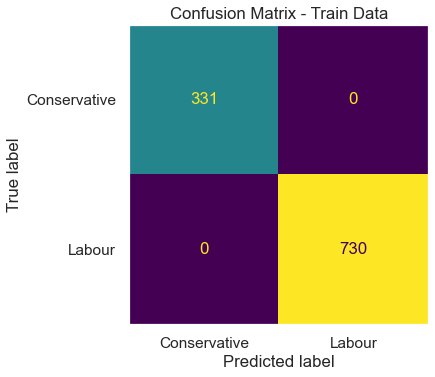

In [287]:
plot_confusion_matrix(gbc_model,X_train,y_train,colorbar=False)
plt.grid(False)
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Train Data');

In [288]:
gbc_model.score(X_train,y_train).round(2)

1.0

In [289]:
gbc_metrics=classification_report(y_train,ytrain_predict,output_dict=True)
df_gbc_train=pd.DataFrame(gbc_metrics).round(2).T
df_gbc_train

precision  recall  f1-score  support
0                   1.0     1.0       1.0    331.0
1                   1.0     1.0       1.0    730.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   1061.0
weighted avg        1.0     1.0       1.0   1061.0

AUC:1.00


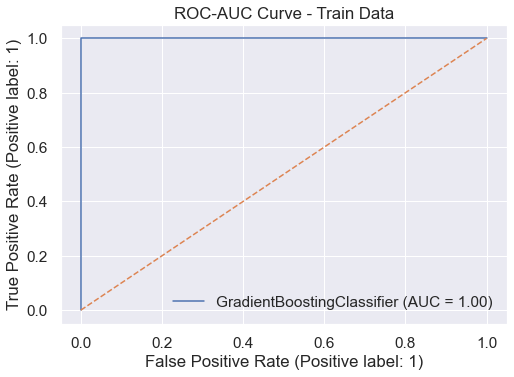

In [290]:
probs=gbc_model.predict_proba(X_train)
probs=probs[:,1]
gbc_train_auc=roc_auc_score(y_train,probs)
print('AUC:%.2f'% gbc_train_auc)
plot_roc_curve(gbc_model,X_train,y_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Train Data');

### Test Performance

In [291]:
confusion_matrix(y_test,ytest_predict)

array([[ 86,  43],
       [ 52, 275]], dtype=int64)

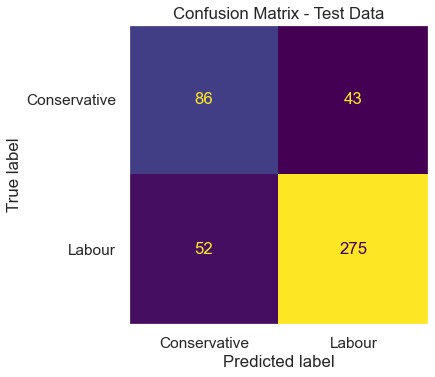

In [292]:
plot_confusion_matrix(gbc_model,X_test,y_test,colorbar=False)
plt.grid(False)
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)
plt.title('Confusion Matrix - Test Data');

In [293]:
gbc_model.score(X_test,y_test).round(2)

0.79

In [294]:
gbc_metrics=classification_report(y_test,ytest_predict,output_dict=True)
df_gbc_test=pd.DataFrame(gbc_metrics).round(2).T
df_gbc_test

precision  recall  f1-score  support
0                  0.62    0.67      0.64   129.00
1                  0.86    0.84      0.85   327.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.74    0.75      0.75   456.00
weighted avg       0.80    0.79      0.79   456.00

AUC:0.85


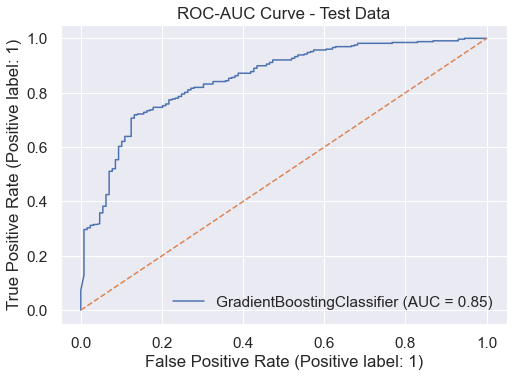

In [295]:
probs=gbc_model.predict_proba(X_test)
probs=probs[:,1]
gbc_test_auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'% gbc_test_auc)
plot_roc_curve(gbc_model,X_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC-AUC Curve - Test Data');

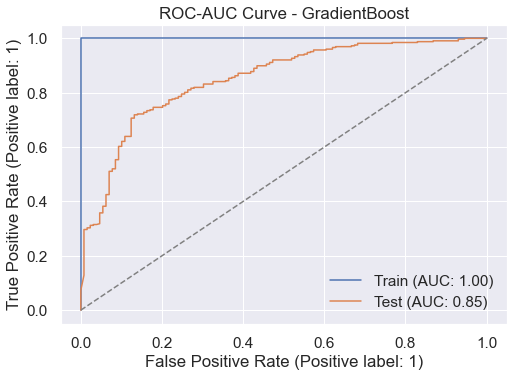

In [296]:
fig,ax=plt.subplots()
plot_roc_curve(gbc_model,X_train,y_train,ax=ax,label='Train (AUC: %0.2f)'% gbc_train_auc)
plot_roc_curve(gbc_model,X_test,y_test,ax=ax,label='Test (AUC: %0.2f)'% gbc_test_auc)
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC-AUC Curve - GradientBoost');

### Cross Validation of all final models

### Logistic Regression

In [297]:
from sklearn.model_selection import cross_val_score

In [298]:
scores=cross_val_score(best_logit_grid,X_train,y_train,cv=10,n_jobs=-1)
scores

array([0.85046729, 0.83962264, 0.8490566 , 0.77358491, 0.83018868,
       0.83962264, 0.82075472, 0.8490566 , 0.83962264, 0.79245283])

In [299]:
logit_train_CVmean=scores.mean()
logit_train_CVstd=scores.std()
print("Logit Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Train Accuracy: 0.83 (+/- 0.02)


In [300]:
scores=cross_val_score(best_logit_grid,X_test,y_test,cv=10,n_jobs=-1)
scores

array([0.84782609, 0.67391304, 0.76086957, 0.89130435, 0.86956522,
       0.84782609, 0.93333333, 0.82222222, 0.75555556, 0.73333333])

In [301]:
logit_test_CVmean=scores.mean()
logit_test_CVstd=scores.std()
print('Logit Test Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

Logit Test Accuracy: 0.81 (+/- 0.08)


### LDA

In [302]:
scores=cross_val_score(best_lda_grid,X_train,y_train,cv=10,n_jobs=-1)
scores

array([0.85046729, 0.8490566 , 0.83962264, 0.83018868, 0.83018868,
       0.83962264, 0.82075472, 0.83962264, 0.83018868, 0.79245283])

In [303]:
lda_train_CVmean=scores.mean()
lda_train_CVstd=scores.std()
print('LDA Train Accuracy: %0.2f (+/- %0.2f)'% (scores.mean(),scores.std()))

LDA Train Accuracy: 0.83 (+/- 0.02)


In [304]:
scores=cross_val_score(best_lda_grid,X_test,y_test,cv=10,n_jobs=-1)
scores

array([0.86956522, 0.69565217, 0.80434783, 0.84782609, 0.82608696,
       0.86956522, 0.91111111, 0.84444444, 0.8       , 0.82222222])

In [305]:
lda_test_CVmean=scores.mean()
lda_test_CVstd=scores.std()
print('LDA Test Accuracy: %0.2f (+/- %0.2f)'% (lda_test_CVmean,lda_test_CVstd))

LDA Test Accuracy: 0.83 (+/- 0.05)


### KNN

In [306]:
scores=cross_val_score(best_knn_grid,X_train,y_train,cv=10,n_jobs=-1)
scores

array([0.78504673, 0.83962264, 0.83018868, 0.73584906, 0.81132075,
       0.79245283, 0.78301887, 0.82075472, 0.82075472, 0.78301887])

In [307]:
knn_train_CVmean=scores.mean()
knn_train_CVstd=scores.std()
print('KNN Train Accuracy: %0.2f (+/- %0.2f)'%(knn_train_CVmean,knn_train_CVstd))

KNN Train Accuracy: 0.80 (+/- 0.03)


In [308]:
scores=cross_val_score(best_knn_grid,X_test,y_test,cv=10,n_jobs=-1)
scores

array([0.84782609, 0.73913043, 0.82608696, 0.82608696, 0.7826087 ,
       0.84782609, 0.91111111, 0.77777778, 0.77777778, 0.84444444])

In [309]:
knn_test_CVmean=scores.mean()
knn_test_CVstd=scores.std()
print('KNN Test Accuracy: %0.2f (+/- %0.2f)' % (knn_test_CVmean,knn_test_CVstd))

KNN Test Accuracy: 0.82 (+/- 0.05)


### Naive Bayes

In [310]:
scores=cross_val_score(nb_model,X_train,y_train,cv=10,n_jobs=-1)
scores

array([0.85046729, 0.85849057, 0.8490566 , 0.81132075, 0.83018868,
       0.83962264, 0.81132075, 0.83962264, 0.82075472, 0.80188679])

In [311]:
nb_train_CVmean=scores.mean()
nb_train_CVstd=scores.std()
print('Naive Bayes Train Accuracy: %0.2f (+/- %0.2f)'%(nb_train_CVmean,nb_train_CVstd))

Naive Bayes Train Accuracy: 0.83 (+/- 0.02)


In [312]:
scores=cross_val_score(nb_model,X_test,y_test,cv=10,n_jobs=-1)
scores

array([0.82608696, 0.67391304, 0.82608696, 0.89130435, 0.84782609,
       0.86956522, 0.91111111, 0.84444444, 0.8       , 0.8       ])

In [313]:
nb_test_CVmean=scores.mean()
nb_test_CVstd=scores.std()
print('Naive Bayes Test Accuracy: %0.2f (+/- %0.2f)'%(nb_test_CVmean,nb_test_CVstd))

Naive Bayes Test Accuracy: 0.83 (+/- 0.06)


### Bagging with RF

In [314]:
scores=cross_val_score(bagging_model,X_train,y_train,cv=10,n_jobs=-1)
scores

array([0.85046729, 0.85849057, 0.82075472, 0.79245283, 0.83962264,
       0.83018868, 0.80188679, 0.89622642, 0.85849057, 0.81132075])

In [315]:
bagg_train_CVmean=scores.mean()
bagg_train_CVstd=scores.std()
print('Bagging Train Accuracy: %0.2f (+/- %0.2f)'%(bagg_train_CVmean,bagg_train_CVstd))

Bagging Train Accuracy: 0.84 (+/- 0.03)


In [316]:
scores=cross_val_score(bagging_model,X_test,y_test,cv=10,n_jobs=-1)
scores

array([0.86956522, 0.7173913 , 0.80434783, 0.89130435, 0.80434783,
       0.86956522, 0.93333333, 0.82222222, 0.86666667, 0.82222222])

In [317]:
bagg_test_CVmean=scores.mean()
bagg_test_CVstd=scores.std()
print('Bagging Test Accuracy: %0.2f (+/- %0.2f)'%(bagg_test_CVmean,bagg_test_CVstd))

Bagging Test Accuracy: 0.84 (+/- 0.06)


### AdaBoosting

In [318]:
scores=cross_val_score(adb_model,X_train,y_train,cv=10,n_jobs=-1)
scores

array([0.87850467, 0.86792453, 0.81132075, 0.76415094, 0.82075472,
       0.82075472, 0.80188679, 0.83962264, 0.83018868, 0.82075472])

In [319]:
adb_train_CVmean=scores.mean()
adb_train_CVstd=scores.std()
print('AdaBoosting Train Accuracy: %0.2f (+/- %0.2f)'%(adb_train_CVmean,adb_train_CVstd))

AdaBoosting Train Accuracy: 0.83 (+/- 0.03)


In [320]:
scores=cross_val_score(adb_model,X_test,y_test,cv=10,n_jobs=-1)
scores

array([0.86956522, 0.73913043, 0.76086957, 0.86956522, 0.84782609,
       0.84782609, 0.84444444, 0.82222222, 0.8       , 0.73333333])

In [321]:
adb_test_CVmean=scores.mean()
adb_test_CVstd=scores.std()
print('AdaBoosting Test Accuracy: %0.2f (+/- %0.2f)'%(adb_test_CVmean,adb_test_CVstd))

AdaBoosting Test Accuracy: 0.81 (+/- 0.05)


### Gradient Boosting Classifier

In [322]:
scores=cross_val_score(gbc_model,X_train,y_train,cv=10,n_jobs=-1)
scores

array([0.8317757 , 0.85849057, 0.80188679, 0.82075472, 0.77358491,
       0.80188679, 0.82075472, 0.8490566 , 0.79245283, 0.73584906])

In [323]:
gbc_train_CVmean=scores.mean()
gbc_train_CVstd=scores.std()
print('Gradient Boosting Train Accuracy: %0.2f (+/- %0.2f)'%(gbc_train_CVmean,gbc_train_CVstd))

Gradient Boosting Train Accuracy: 0.81 (+/- 0.03)


In [324]:
scores=cross_val_score(gbc_model,X_test,y_test,cv=10,n_jobs=-1)
scores

array([0.80434783, 0.65217391, 0.7826087 , 0.7826087 , 0.67391304,
       0.76086957, 0.82222222, 0.77777778, 0.73333333, 0.77777778])

In [325]:
gbc_test_CVmean=scores.mean()
gbc_test_CVstd=scores.std()
print('Gradient Boosting Test Accuracy: %0.2f (+/- %0.2f)'%(gbc_test_CVmean,gbc_test_CVstd))

Gradient Boosting Test Accuracy: 0.76 (+/- 0.05)


### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [326]:
index=['Accuracy','AUC','Recall-Conservative','Recall-Labour','Precision-Conservative',
       'Precision-Labour','F1 Score-Conservative','F1 Score-Labour']
Logit_train=[df_logit_train.loc['accuracy'][0],logit_train_auc,df_logit_train.loc['0'][1],
           df_logit_train.loc['1'][1],df_logit_train.loc['0'][0],df_logit_train.loc['1'][0],
            df_logit_train.loc['0'][2],df_logit_train.loc['1'][2]]
LDA_train=[df_lda_train.loc['accuracy'][0],lda_train_auc,df_lda_train.loc['0'][1],
           df_lda_train.loc['1'][1],df_lda_train.loc['0'][0],df_lda_train.loc['1'][0],
            df_lda_train.loc['0'][2],df_lda_train.loc['1'][2]]
KNN_train=[df_knn_train.loc['accuracy'][0],knn_train_auc,df_knn_train.loc['0'][1],
           df_knn_train.loc['1'][1],df_knn_train.loc['0'][0],df_knn_train.loc['1'][0],
            df_knn_train.loc['0'][2],df_knn_train.loc['1'][2]]
NB_train=[df_nb_train.loc['accuracy'][0],nb_train_auc,df_nb_train.loc['0'][1],
           df_nb_train.loc['1'][1],df_nb_train.loc['0'][0],df_nb_train.loc['1'][0],
            df_nb_train.loc['0'][2],df_nb_train.loc['1'][2]]
BAGG_train=[df_bag_rf_train.loc['accuracy'][0],bagg_train_auc,df_bag_rf_train.loc['0'][1],
           df_bag_rf_train.loc['1'][1],df_bag_rf_train.loc['0'][0],df_bag_rf_train.loc['1'][0],
            df_bag_rf_train.loc['0'][2],df_bag_rf_train.loc['1'][2]]
ADB_train=[df_adb_train.loc['accuracy'][0],adb_train_auc,df_adb_train.loc['0'][1],
           df_adb_train.loc['1'][1],df_adb_train.loc['0'][0],df_adb_train.loc['1'][0],
            df_adb_train.loc['0'][2],df_adb_train.loc['1'][2]]
GBC_train=[df_gbc_train.loc['accuracy'][0],gbc_train_auc,df_gbc_train.loc['0'][1],
           df_gbc_train.loc['1'][1],df_gbc_train.loc['0'][0],df_gbc_train.loc['1'][0],
            df_gbc_train.loc['0'][2],df_gbc_train.loc['1'][2]]
train_perf_data=pd.DataFrame({'Logit Train':Logit_train,
                             'LDA Train':LDA_train,
                             'KNN Train':KNN_train,
                             'NB Train':NB_train,
                             'BAGG Train':BAGG_train,
                             'AdaBoost Train':ADB_train,
                             'GradientBoost Train':GBC_train},index=index)
train_perf_data.round(2)

Logit Train  LDA Train  KNN Train  NB Train  \
Accuracy                       0.83       0.83       0.87      0.84   
AUC                            0.90       0.90       0.94      0.89   
Recall-Conservative            0.82       0.69       0.77      0.73   
Recall-Labour                  0.84       0.90       0.92      0.89   
Precision-Conservative         0.70       0.76       0.81      0.74   
Precision-Labour               0.91       0.86       0.90      0.88   
F1 Score-Conservative          0.75       0.72       0.79      0.74   
F1 Score-Labour                0.87       0.88       0.91      0.88   

                        BAGG Train  AdaBoost Train  GradientBoost Train  
Accuracy                      0.91            0.85                  1.0  
AUC                           0.97            0.92                  1.0  
Recall-Conservative           0.90            0.71                  1.0  
Recall-Labour                 0.91            0.91                  1.0  
Precision-Conservative        0.82            0.78                  1.0  
Precision-Labour              0.95            0.87                  1.0  
F1 Score-Conservative         0.86            0.74                  1.0  
F1 Score-Labour               0.93            0.89                  1.0

In [327]:
index=['Accuracy','AUC','Recall-Conservative','Recall-Labour','Precision-Conservative',
       'Precision-Labour','F1 Score-Conservative','F1 Score-Labour']
Logit_test=[df_logit_test.loc['accuracy'][0],logit_test_auc,df_logit_test.loc['0'][1],
           df_logit_test.loc['1'][1],df_logit_test.loc['0'][0],df_logit_test.loc['1'][0],
            df_logit_test.loc['0'][2],df_logit_test.loc['1'][2]]
LDA_test=[df_lda_test.loc['accuracy'][0],lda_test_auc,df_lda_test.loc['0'][1],
           df_lda_test.loc['1'][1],df_lda_test.loc['0'][0],df_lda_test.loc['1'][0],
            df_lda_test.loc['0'][2],df_lda_test.loc['1'][2]]
KNN_test=[df_knn_test.loc['accuracy'][0],knn_test_auc,df_knn_test.loc['0'][1],
           df_knn_test.loc['1'][1],df_knn_test.loc['0'][0],df_knn_test.loc['1'][0],
            df_knn_test.loc['0'][2],df_knn_test.loc['1'][2]]
NB_test=[df_nb_test.loc['accuracy'][0],nb_test_auc,df_nb_test.loc['0'][1],
           df_nb_test.loc['1'][1],df_nb_test.loc['0'][0],df_nb_test.loc['1'][0],
            df_nb_test.loc['0'][2],df_nb_test.loc['1'][2]]
BAGG_test=[df_bag_rf_test.loc['accuracy'][0],bagg_test_auc,df_bag_rf_test.loc['0'][1],
           df_bag_rf_test.loc['1'][1],df_bag_rf_test.loc['0'][0],df_bag_rf_test.loc['1'][0],
            df_bag_rf_test.loc['0'][2],df_bag_rf_test.loc['1'][2]]
ADB_test=[df_adb_test.loc['accuracy'][0],adb_test_auc,df_adb_test.loc['0'][1],
           df_adb_test.loc['1'][1],df_adb_test.loc['0'][0],df_adb_test.loc['1'][0],
            df_adb_test.loc['0'][2],df_adb_test.loc['1'][2]]
GBC_test=[df_gbc_test.loc['accuracy'][0],gbc_test_auc,df_gbc_test.loc['0'][1],
           df_gbc_test.loc['1'][1],df_gbc_test.loc['0'][0],df_gbc_test.loc['1'][0],
            df_gbc_test.loc['0'][2],df_gbc_test.loc['1'][2]]
test_perf_data=pd.DataFrame({'Logit Test':Logit_test,
                             'LDA Test':LDA_test,
                             'KNN Test':KNN_test,
                            'NB Test':NB_test,
                            'BAGG Test':BAGG_test,
                            'AdaBoost Test':ADB_test,
                            'GradientBoost Test':GBC_test},index=index)
test_perf_data.round(2)

Logit Test  LDA Test  KNN Test  NB Test  BAGG Test  \
Accuracy                      0.81      0.82      0.81     0.80       0.82   
AUC                           0.86      0.87      0.84     0.86       0.88   
Recall-Conservative           0.74      0.64      0.67     0.64       0.72   
Recall-Labour                 0.83      0.89      0.87     0.87       0.85   
Precision-Conservative        0.64      0.70      0.66     0.66       0.66   
Precision-Labour              0.89      0.86      0.87     0.86       0.89   
F1 Score-Conservative         0.68      0.67      0.66     0.65       0.69   
F1 Score-Labour               0.86      0.88      0.87     0.86       0.87   

                        AdaBoost Test  GradientBoost Test  
Accuracy                         0.80                0.79  
AUC                              0.84                0.85  
Recall-Conservative              0.65                0.67  
Recall-Labour                    0.86                0.84  
Precision-Conservative           0.65                0.62  
Precision-Labour                 0.86                0.86  
F1 Score-Conservative            0.65                0.64  
F1 Score-Labour                  0.86                0.85

In [328]:
from matplotlib.patches import Rectangle

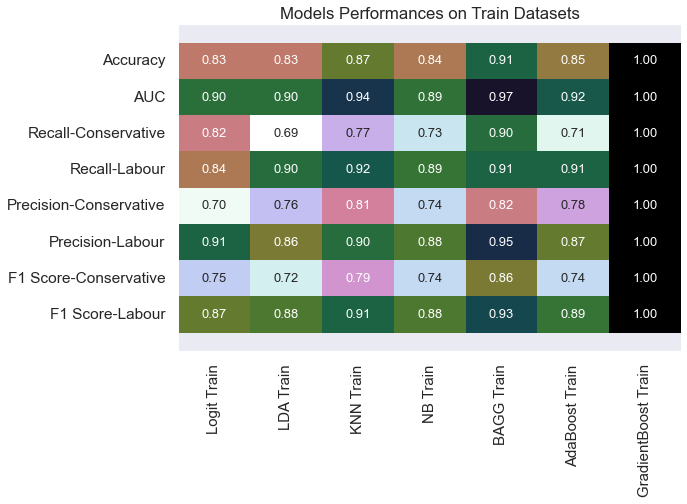

In [329]:
plt.subplots(figsize=(9,6))
ax = sns.heatmap(train_perf_data, cmap='cubehelix_r', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=15)
plt.title('Models Performances on Train Datasets');

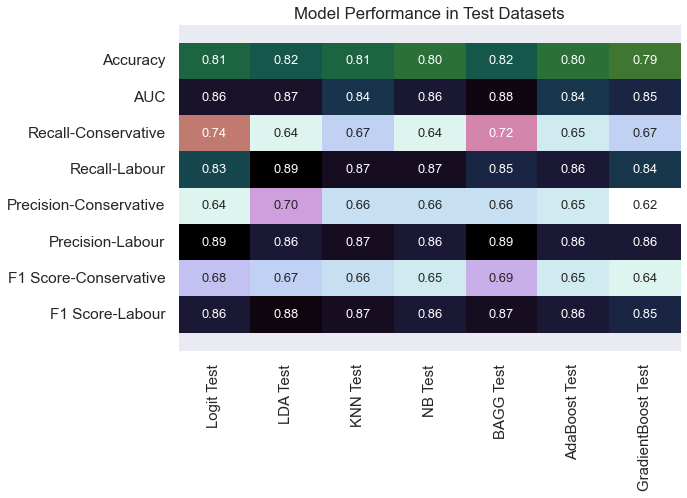

In [330]:
plt.subplots(figsize=(9,6))
ax = sns.heatmap(test_perf_data, cmap='cubehelix_r', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=15)
plt.title('Model Performance in Test Datasets');

In [331]:
index=['CV Mean Accuracy','CV Std Deviation']
CV_data = pd.DataFrame({'Logit Train':[logit_train_CVmean,logit_train_CVstd],
                     'Logit Test':[logit_test_CVmean,logit_test_CVstd],
                     'LDA Train':[lda_train_CVmean,lda_train_CVstd],
                     'LDA Test':[lda_test_CVmean,lda_test_CVstd],
                     'KNN Train':[knn_train_CVmean,knn_train_CVstd],
                     'KNN Test':[knn_test_CVmean,knn_test_CVstd],
                     'NB Train':[nb_train_CVmean,nb_train_CVstd],
                     'NB Test':[nb_test_CVmean,nb_test_CVstd],
                     'Bagging Train':[bagg_train_CVmean,bagg_train_CVstd],
                     'Bagging Test':[bagg_test_CVmean,bagg_test_CVstd],
                     'AdaBoost Train':[adb_train_CVmean,adb_train_CVstd],
                     'AdaBoost Test':[adb_test_CVmean,adb_test_CVstd],
                    'GradientBoost Train':[gbc_train_CVmean,gbc_train_CVstd],
                    'GradientBoost Test':[gbc_test_CVmean,gbc_test_CVstd]
                    },index=index)
round(CV_data,2)


Logit Train  Logit Test  LDA Train  LDA Test  KNN Train  \
CV Mean Accuracy         0.83        0.81       0.83      0.83       0.80   
CV Std Deviation         0.02        0.08       0.02      0.05       0.03   

                  KNN Test  NB Train  NB Test  Bagging Train  Bagging Test  \
CV Mean Accuracy      0.82      0.83     0.83           0.84          0.84   
CV Std Deviation      0.05      0.02     0.06           0.03          0.06   

                  AdaBoost Train  AdaBoost Test  GradientBoost Train  \
CV Mean Accuracy            0.83           0.81                 0.81   
CV Std Deviation            0.03           0.05                 0.03   

                  GradientBoost Test  
CV Mean Accuracy                0.76  
CV Std Deviation                0.05

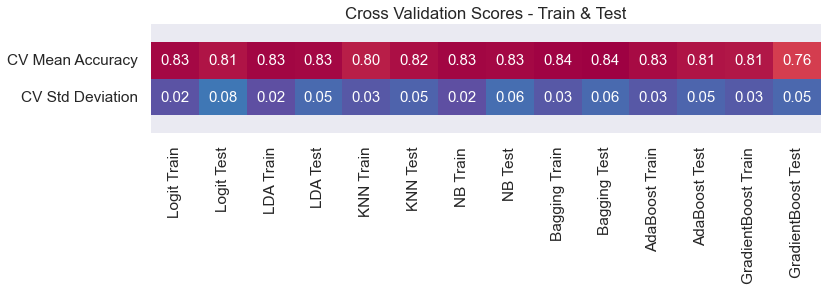

In [332]:
plt.subplots(figsize=(12,2))
ax = sns.heatmap(CV_data, cmap='Spectral_r', annot=True, fmt='.2f',annot_kws={"fontsize":15}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Cross Validation Scores - Train & Test');

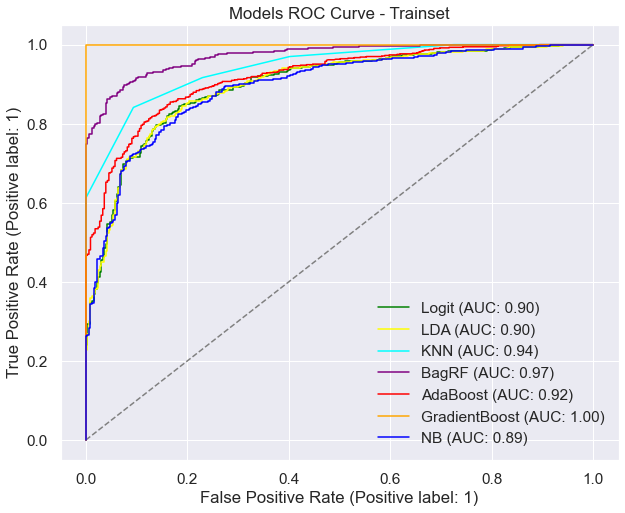

In [333]:
fig,ax=plt.subplots(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--',color='grey')
plot_roc_curve(best_logit_grid,X_train,y_train,ax=ax,color='green',label='Logit (AUC: %0.2f)'% logit_train_auc)
plot_roc_curve(best_lda_grid,X_train,y_train,ax=ax,color='yellow',label='LDA (AUC: %0.2f)'% lda_train_auc)
plot_roc_curve(best_knn_grid,X_train_scaled,y_train,ax=ax,color='cyan',label='KNN (AUC: %0.2f)'% knn_train_auc)
plot_roc_curve(bagging_model,X_train,y_train,ax=ax,color='purple',label='BagRF (AUC: %0.2f)'% bagg_train_auc)
plot_roc_curve(adb_model,X_train,y_train,ax=ax,color='red',label='AdaBoost (AUC: %0.2f)'% adb_train_auc)
plot_roc_curve(gbc_model,X_train,y_train,ax=ax,color='orange',label='GradientBoost (AUC: %0.2f)'% gbc_train_auc)
plot_roc_curve(nb_model,X_train,y_train,ax=ax,color='blue',label='NB (AUC: %0.2f)'% nb_train_auc)
plt.title('Models ROC Curve - Trainset')
plt.legend(loc="lower right");

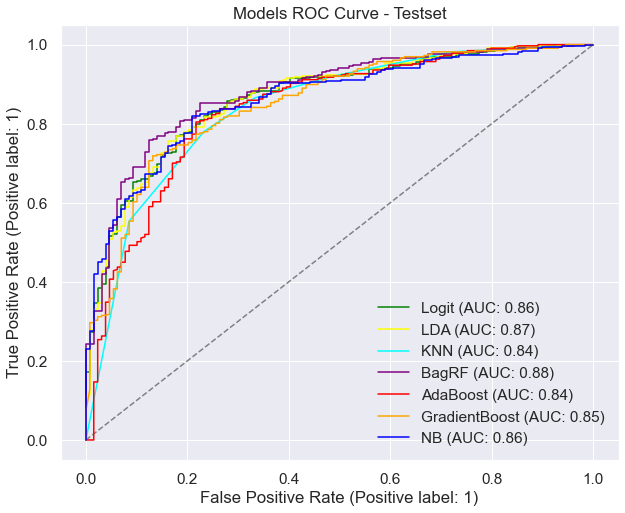

In [334]:
fig,ax=plt.subplots(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--',color='grey')
plot_roc_curve(best_logit_grid,X_test,y_test,ax=ax,color='green',label='Logit (AUC: %0.2f)'% logit_test_auc)
plot_roc_curve(best_lda_grid,X_test,y_test,ax=ax,color='yellow',label='LDA (AUC: %0.2f)'% lda_test_auc)
plot_roc_curve(best_knn_grid,X_test_scaled,y_test,ax=ax,color='cyan',label='KNN (AUC: %0.2f)'% knn_test_auc)
plot_roc_curve(bagging_model,X_test,y_test,ax=ax,color='purple',label='BagRF (AUC: %0.2f)'% bagg_test_auc)
plot_roc_curve(adb_model,X_test,y_test,ax=ax,color='red',label='AdaBoost (AUC: %0.2f)'% adb_test_auc)
plot_roc_curve(gbc_model,X_test,y_test,ax=ax,color='orange',label='GradientBoost (AUC: %0.2f)'% gbc_test_auc)
plot_roc_curve(nb_model,X_test,y_test,ax=ax,color='blue',label='NB (AUC: %0.2f)'% nb_test_auc);
plt.title('Models ROC Curve - Testset');
plt.legend(loc='lower right');

### Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

- President Franklin D. Roosevelt in 1941
- President John F. Kennedy in 1961
- President Richard Nixon in 1973

In [335]:
import re
import nltk
import wordcloud
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [336]:
index=['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                              'text':[inaugural.raw('1941-Roosevelt.txt'),
                                     inaugural.raw('1961-Kennedy.txt'),
                                     inaugural.raw('1973-Nixon.txt')]},index=index)

In [337]:
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  
1941-Roosevelt  On each national day of inauguration since 178...  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

### Number of words

In [338]:
inaugural_speech['word_count']=inaugural_speech['text'].apply(lambda x: len(str(x).split(' ')))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  
1941-Roosevelt  On each national day of inauguration since 178...        1323  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769

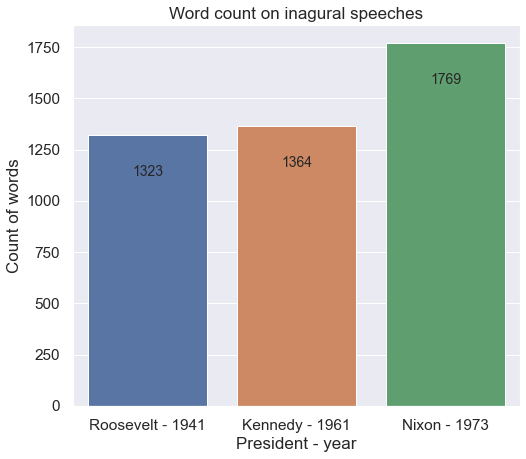

In [339]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech)
plt.title('Word count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of words',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

### Number of characters

In [340]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  
1941-Roosevelt        7571  
1961-Kennedy          7618  
1973-Nixon            9991

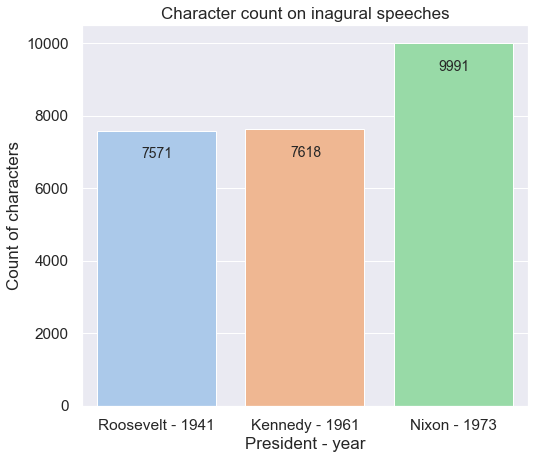

In [341]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Character count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of characters',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)

### Number of sentences

In [342]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

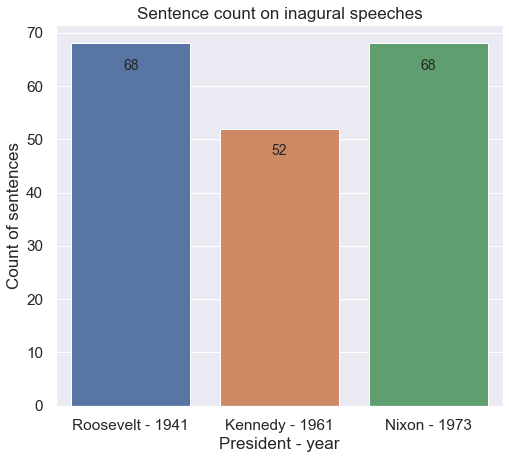

In [343]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech)
plt.title('Sentence count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of sentences',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)

### Q2.2 Remove all the stopwords from all three speeches.

In [344]:
# Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [345]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [346]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [347]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  national day inauguration since 1789 people re...        1323   
1961-Kennedy    vice president johnson speaker chief justice p...        1364   
1973-Nixon      vice president speaker chief justice senator c...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

In [348]:
print("Speech of president Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

Speech of president Roosevelt without stopwords


['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [349]:
print("Speech of president Kennedy without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

Speech of president Kennedy without stopwords


['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [350]:
print("Speech of president Nixon without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

Speech of president Nixon without stopwords


['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

In [351]:
print('word count before removing stopwords')
inaugural_speech['word_count']

word count before removing stopwords


1941-Roosevelt    1323
1961-Kennedy      1364
1973-Nixon        1769
Name: word_count, dtype: int64

In [352]:
print('word count after removing stopwords')
inaugural_speech['text'].apply(lambda x: len(str(x).split(' ')))

word count after removing stopwords


1941-Roosevelt    617
1961-Kennedy      658
1973-Nixon        775
Name: text, dtype: int64

### Q 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [353]:
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  national day inauguration since 1789 people re...        1323   
1961-Kennedy    vice president johnson speaker chief justice p...        1364   
1973-Nixon      vice president speaker chief justice senator c...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

In [354]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

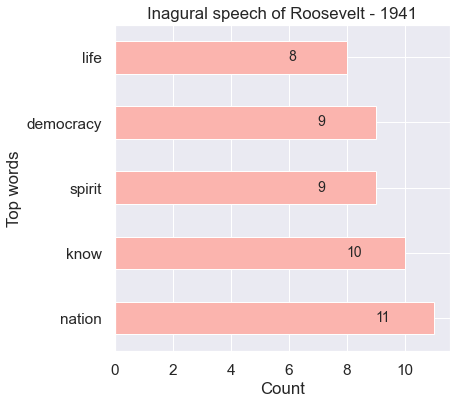

In [355]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Pastel1')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [356]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

world     8
sides     8
new       7
pledge    7
power     5
dtype: int64

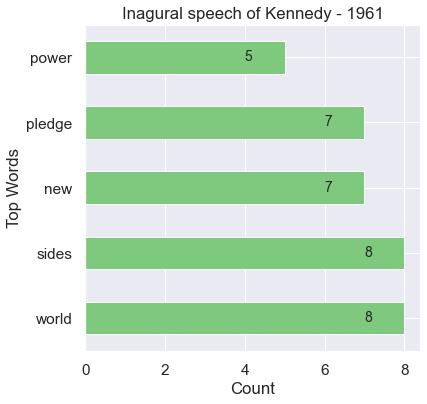

In [357]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Accent')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
plt.ylabel('Top Words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [358]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

peace             19
world             16
new               15
america           13
responsibility    11
dtype: int64

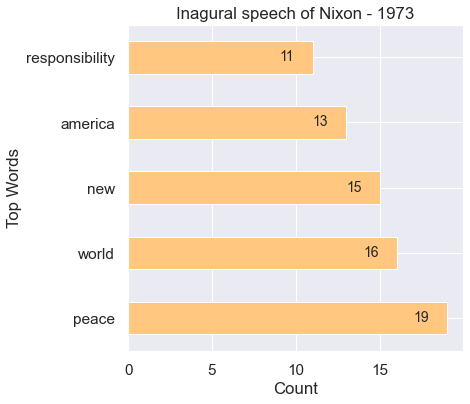

In [359]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'copper_r')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
plt.ylabel('Top Words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

### Q 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

Word Cloud for Roosewelt after cleaning


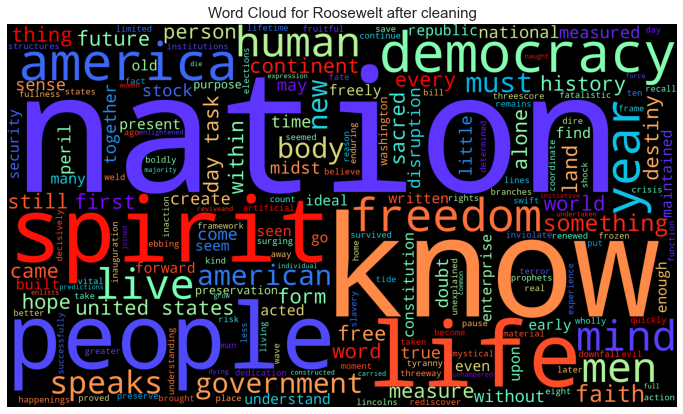

In [360]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosewelt after cleaning",fontsize=15)
print("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Kennedy after cleaning


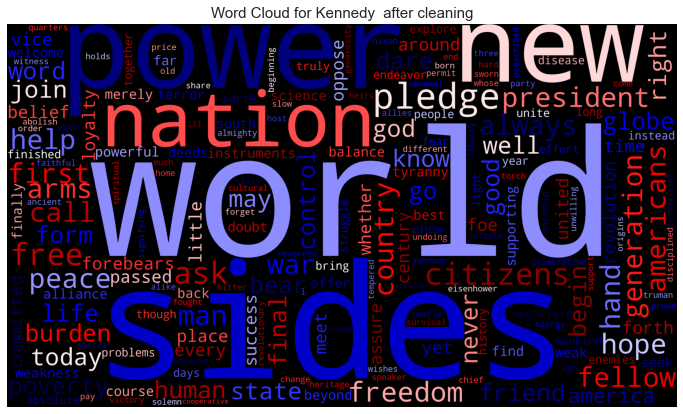

In [361]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Nixon after cleaning


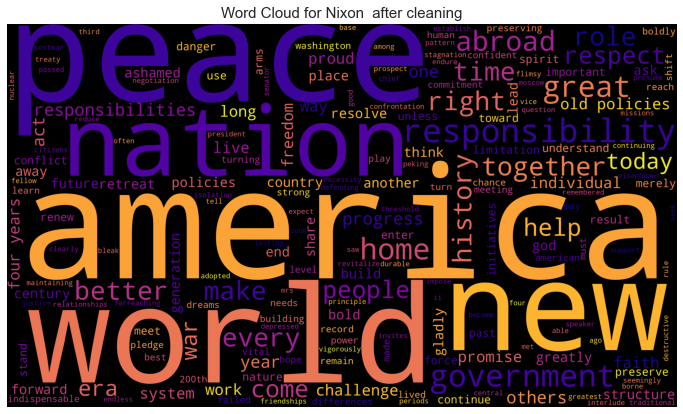

In [362]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()